# MAT-classification: Analysis and Classification methods for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use mat-classification as a python library.

The present package offers a tool, to support the user in the task of data analysis of multiple aspect trajectories. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Dec, 2023
Copyright (C) 2023, License GPL Version 3 or superior (see LICENSE file)

In [1]:
!pip install mat-classification

## 1. Loading data
To use helpers for data pre-processing, import from package `matdata` (dependency: [mat-data](https://github.com/ttportela/mat-data)):

### 1.1. Loading a sample data
    a) Lets start by loading FoursquareNYC data:
(For other preprocessing functions, check the docs: https://mat-analysis.github.io/mat-tools/

In [1]:
from matdata.dataset import load_ds

dataset='mat.FoursquareNYC'

data = load_ds(dataset, missing='-999')
data

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1055k  100 1055k    0     0   487k      0  0:00:02  0:00:02 --:--:--  488k


,space,time,day,poi,type,root_type,rating,weather,tid,label
0,40.8331652006224 -73.9418603427692,317,Monday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clear,126,6
1,40.8340978041072 -73.9452672225881,1404,Monday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds,126,6
2,40.8331652006224 -73.9418603427692,0,Tuesday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clouds,126,6
3,40.7646959283254 -73.8851974964414,1069,Thursday,Popeyes Louisiana Kitchen,Fried Chicken Joint,Food,6.6,Clear,126,6
4,40.7660790376824 -73.8835287094116,1120,Thursday,MTA Bus Operations Depot - LaGuardia,Bus Station,Travel & Transport,-1.0,Clear,126,6
...,...,...,...,...,...,...,...,...,...,...
66941,40.7047332789043 -73.9877378940582,1037,Friday,Miami Ad School Brooklyn,General College & University,College & University,-1.0,Clouds,29563,1070
66942,40.6951627360199 -73.9954478691072,1210,Friday,Lantern Thai Kitchen,Thai Restaurant,Food,8.0,Clouds,29563,1070
66943,40.6978026652822 -73.9941451630314,481,Saturday,Eastern Athletic Club,Gym,Outdoors & Recreation,6.9,Clouds,29563,1070
66944,40.6946728967503 -73.9940820360805,819,Saturday,Starbucks,Coffee Shop,Food,7.0,Clouds,29563,1070


In [2]:
from matdata.preprocess import klabels_stratify
train, test = klabels_stratify(data, kl=10) #, random_num=42)

train.label.unique(), '--', len(train.tid.unique()), len(test.tid.unique())

Spliting Data (class-balanced):   0%|          | 0/10 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/10 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/10 [00:00<?, ?it/s]

(array([ 84, 164, 181, 390, 553, 646, 662, 702, 768, 901]), '--', 112, 56)

### 1.2. Saving and Conversions
    b) Saving trajectories:

In [4]:
import pandas as pd
train.to_parquet(f'sample/data/{dataset.split(".")[1]}/train.parquet', index=False)
test.to_parquet(f'sample/data/{dataset.split(".")[1]}/test.parquet', index=False)

Also, we can save using the converter functions (which provide more options), in other formats for other input types of methods:

In [5]:
from matdata.converter import df2csv, df2zip, df2parquet

# Saving as csv:
df2csv(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2csv(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as zip (containing trajectory type of files):
df2zip(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2zip(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as parquet (override):
df2parquet(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2parquet(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Check docs:
help(df2parquet)

Writing CSV: sample/data/FoursquareNYC/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/56 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/28 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/test.parquet
Done.
 --------------------------------------------------------------------------------
Help on function df2parquet in module matdata.converter:

df2parquet(df, data_path, file='train', tid_col='tid', class_col='label', select_cols=None, opLabel='Writing Parquet')
    Writes a pandas DataFrame to a Parquet file.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to be written to the Parquet file.
    data_path : str
        The directory path where the Parquet file will be saved.
    file : str, optional (default='train')
        The base name of the Parquet file (without extension).
    tid_col : str, optional (default='tid')
        The name of the column to be used as the trajectory identifier.
    class_col : str, optional (default='label')
        Th

## 2. Classification Methods

All classification methods follow similar classifier model structure, you can use in two ways:

Option 1 (the class default data preparation):
- `prepare_input(train, test)` => `model.train()` => `model.test()`

Option 2 (your own data preparation):
- `model.fit(X_train, y_train, X_val, y_val)` => `model.predict(X_test, y_test)`

### 2.1. Trajectory Based Methods

Methods based on inputing trajectory data:

#### 2.1.1. MARC

In [7]:
from matclassification.methods import MARC

model = MARC()
model.prepare_input(train, test)
model.train()
model.test()
## We can visualize the training report (the same on most models):
model.report

2024-06-30 18:59:54.691689

[MARC:] Building model

###########    DATA PREPARATION      ###########
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'space': 189 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'time': 580 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'day': 7 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'poi': 172 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'type': 97 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'root_type': 10 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'rating': 44 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Attribute 'weather': 6 unique values
[    INFO    ] 2024-06-30 18:59:54 :: Total of attribute/value pairs: 1105
[[[    INFO    ] 2024-06-30 18:59:54 :: Processing trajectory 46/46. 
[    INFO    ] 2024-06-30 18:59:54 :: Loading data from files ... DONE!
[    INFO    ] 2024-06-30 18:59:54 :: Trajectories:  46
[    INFO    ] 2024-06-30 18:59

[MARC:] Model Training:   0%|          | 0/18 [00:00<?, ?it/s]

Metal device set to: Apple M1


===== Training Epoch 1 =====
Epoch 1/1000


2024-06-30 18:59:55.228426: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 191ms/steps: 28.4335 - acc: 0.41
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.870833	prec_macro: 0.888889	rec_macro: 0.882353
1/1 [==============================] - 0s 57ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.660633	prec_macro: 0.700000	rec_macro: 0.678571
1/1 [==============================] - 2s 2s/step - loss: 28.4335 - acc: 0.4194 - val_loss: 27.8171 - val_acc: 0.6667
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 16ms/stepss: 27.8030 - acc: 0.67
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 18ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.732143	prec_macro: 0.732143	rec_macro: 0.732143
1/1 [==============================] - 0s 157ms/step - loss: 27.8030 - acc: 0.6774 - val_loss: 27.2089 - val_acc: 0.7333
===== Training Epoch 3 =====
Epoch 3/1000
1/1 [====================

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 205ms/steps: 32.5951 - acc: 0.48
TRAIN		acc: 0.838710	acc_top5: 1.000000	f1_macro: 0.827202	prec_macro: 0.886364	rec_macro: 0.821429
1/1 [==============================] - 0s 65ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 2s 2s/step - loss: 32.5951 - acc: 0.4839 - val_loss: 31.7824 - val_acc: 0.7333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 19ms/stepss: 31.7691 - acc: 0.74
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 21ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 0s 182ms/step - loss: 31.7691 - acc: 0.7419 - val_loss: 30.9864 - val_acc: 0.8000
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 203ms/steps: 28.3693 - acc: 0.29
TRAIN		acc: 0.612903	acc_top5: 1.000000	f1_macro: 0.577273	prec_macro: 0.616848	rec_macro: 0.590336
1/1 [==============================] - 0s 78ms/step
TEST		acc: 0.600000	acc_top5: 1.000000	f1_macro: 0.550000	prec_macro: 0.625000	rec_macro: 0.580357
1/1 [==============================] - 2s 2s/step - loss: 28.3693 - acc: 0.2903 - val_loss: 28.3543 - val_acc: 0.6000
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 19ms/stepss: 28.3531 - acc: 0.58
TRAIN		acc: 0.645161	acc_top5: 1.000000	f1_macro: 0.582619	prec_macro: 0.707692	rec_macro: 0.613445
1/1 [==============================] - 0s 24ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 0s 190ms/step - loss: 28.3531 - acc: 0.5806 - val_loss: 28.3533 - val_acc: 0.6667
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 231ms/steps: 32.6407 - acc: 0.61
TRAIN		acc: 0.774194	acc_top5: 1.000000	f1_macro: 0.747967	prec_macro: 0.854167	rec_macro: 0.750000
1/1 [==============================] - 0s 80ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 2s 2s/step - loss: 32.6407 - acc: 0.6129 - val_loss: 31.8484 - val_acc: 0.7333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 19ms/stepss: 31.8477 - acc: 0.83
TRAIN		acc: 0.645161	acc_top5: 1.000000	f1_macro: 0.554248	prec_macro: 0.803571	rec_macro: 0.607143
1/1 [==============================] - 0s 23ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 0s 201ms/step - loss: 31.8477 - acc: 0.8387 - val_loss: 31.0693 - val_acc: 0.6667
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 203ms/steps: 28.3459 - acc: 0.54
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 72ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 2s 2s/step - loss: 28.3459 - acc: 0.5484 - val_loss: 28.3291 - val_acc: 0.7333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 23ms/stepss: 28.3132 - acc: 0.67
TRAIN		acc: 0.903226	acc_top5: 1.000000	f1_macro: 0.899459	prec_macro: 0.925000	rec_macro: 0.892857
1/1 [==============================] - 0s 25ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 0s 212ms/step - loss: 28.3132 - acc: 0.6774 - val_loss: 28.3184 - val_acc: 0.7333
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 220ms/steps: 32.5981 - acc: 0.70
TRAIN		acc: 0.967742	acc_top5: 1.000000	f1_macro: 0.967196	prec_macro: 0.972222	rec_macro: 0.964286
1/1 [==============================] - 0s 72ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 2s 2s/step - loss: 32.5981 - acc: 0.7097 - val_loss: 31.7973 - val_acc: 0.8000
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 21ms/stepss: 31.7922 - acc: 0.87
TRAIN		acc: 0.967742	acc_top5: 1.000000	f1_macro: 0.967196	prec_macro: 0.972222	rec_macro: 0.964286
1/1 [==============================] - 0s 21ms/step
TEST		acc: 0.933333	acc_top5: 1.000000	f1_macro: 0.932127	prec_macro: 0.944444	rec_macro: 0.928571
1/1 [==============================] - 0s 222ms/step - loss: 31.7922 - acc: 0.8710 - val_loss: 30.9978 - val_acc: 0.9333
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 217ms/steps: 28.3865 - acc: 0.45
TRAIN		acc: 0.838710	acc_top5: 1.000000	f1_macro: 0.832432	prec_macro: 0.854545	rec_macro: 0.827731
1/1 [==============================] - 0s 81ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 2s 2s/step - loss: 28.3865 - acc: 0.4516 - val_loss: 28.3118 - val_acc: 0.8000
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 23ms/stepss: 28.3172 - acc: 0.77
TRAIN		acc: 0.935484	acc_top5: 1.000000	f1_macro: 0.933761	prec_macro: 0.947368	rec_macro: 0.928571
1/1 [==============================] - 0s 28ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 0s 223ms/step - loss: 28.3172 - acc: 0.7742 - val_loss: 28.2850 - val_acc: 0.8000
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 259ms/steps: 32.5812 - acc: 0.25
TRAIN		acc: 0.774194	acc_top5: 1.000000	f1_macro: 0.747967	prec_macro: 0.854167	rec_macro: 0.750000
1/1 [==============================] - 0s 94ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 2s 2s/step - loss: 32.5812 - acc: 0.2581 - val_loss: 31.7559 - val_acc: 0.6667
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 33ms/stepss: 31.7414 - acc: 0.74
TRAIN		acc: 0.967742	acc_top5: 1.000000	f1_macro: 0.967196	prec_macro: 0.972222	rec_macro: 0.964286
1/1 [==============================] - 0s 22ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 0s 254ms/step - loss: 31.7414 - acc: 0.7419 - val_loss: 30.9478 - val_acc: 0.7333
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 231ms/steps: 28.3917 - acc: 0.48
TRAIN		acc: 0.741935	acc_top5: 1.000000	f1_macro: 0.704762	prec_macro: 0.840000	rec_macro: 0.714286
1/1 [==============================] - 0s 96ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 2s 2s/step - loss: 28.3917 - acc: 0.4839 - val_loss: 28.3860 - val_acc: 0.6667
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 33ms/stepss: 28.3796 - acc: 0.74
TRAIN		acc: 0.709677	acc_top5: 1.000000	f1_macro: 0.658507	prec_macro: 0.826923	rec_macro: 0.678571
1/1 [==============================] - 0s 32ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 0s 279ms/step - loss: 28.3796 - acc: 0.7419 - val_loss: 28.3857 - val_acc: 0.6667
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 292ms/steps: 32.6953 - acc: 0.45
TRAIN		acc: 0.580645	acc_top5: 1.000000	f1_macro: 0.428369	prec_macro: 0.783333	rec_macro: 0.535714
1/1 [==============================] - 0s 123ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 2s 2s/step - loss: 32.6953 - acc: 0.4516 - val_loss: 31.9036 - val_acc: 0.5333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 39ms/stepss: 31.9028 - acc: 0.61
TRAIN		acc: 0.580645	acc_top5: 1.000000	f1_macro: 0.428369	prec_macro: 0.783333	rec_macro: 0.535714
1/1 [==============================] - 0s 38ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 0s 331ms/step - loss: 31.9028 - acc: 0.6129 - val_loss: 31.1230 - val_acc: 0.5333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 244ms/steps: 28.3471 - acc: 0.61
TRAIN		acc: 0.741935	acc_top5: 1.000000	f1_macro: 0.704762	prec_macro: 0.840000	rec_macro: 0.714286
1/1 [==============================] - 0s 96ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 2s 2s/step - loss: 28.3471 - acc: 0.6129 - val_loss: 27.7177 - val_acc: 0.6667
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 34ms/stepss: 27.7149 - acc: 0.70
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 36ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 0s 295ms/step - loss: 27.7149 - acc: 0.7097 - val_loss: 27.0967 - val_acc: 0.7333
===== Training Epoch 3 ==

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 268ms/steps: 32.6117 - acc: 0.67
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 109ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 2s 2s/step - loss: 32.6117 - acc: 0.6774 - val_loss: 31.7888 - val_acc: 0.7333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 36ms/stepss: 31.7892 - acc: 0.87
TRAIN		acc: 0.967742	acc_top5: 1.000000	f1_macro: 0.967196	prec_macro: 0.972222	rec_macro: 0.964286
1/1 [==============================] - 0s 28ms/step
TEST		acc: 0.933333	acc_top5: 1.000000	f1_macro: 0.932127	prec_macro: 0.944444	rec_macro: 0.928571
1/1 [==============================] - 0s 278ms/step - loss: 31.7892 - acc: 0.8710 - val_loss: 30.9658 - val_acc: 0.9333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 266ms/steps: 28.4142 - acc: 0.61
TRAIN		acc: 0.903226	acc_top5: 1.000000	f1_macro: 0.901587	prec_macro: 0.905983	rec_macro: 0.899160
1/1 [==============================] - 0s 124ms/step
TEST		acc: 0.866667	acc_top5: 1.000000	f1_macro: 0.861111	prec_macro: 0.900000	rec_macro: 0.857143
1/1 [==============================] - 3s 3s/step - loss: 28.4142 - acc: 0.6129 - val_loss: 28.3442 - val_acc: 0.8667
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 39ms/stepss: 28.3269 - acc: 0.83
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 38ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 0s 336ms/step - loss: 28.3269 - acc: 0.8387 - val_loss: 28.2702 - val_acc: 0.8000
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 292ms/steps: 32.5712 - acc: 0.48
TRAIN		acc: 0.903226	acc_top5: 1.000000	f1_macro: 0.899459	prec_macro: 0.925000	rec_macro: 0.892857
1/1 [==============================] - 0s 132ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 2s 2s/step - loss: 32.5712 - acc: 0.4839 - val_loss: 31.7096 - val_acc: 0.8000
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 29ms/stepss: 31.7105 - acc: 0.77
TRAIN		acc: 0.967742	acc_top5: 1.000000	f1_macro: 0.967196	prec_macro: 0.972222	rec_macro: 0.964286
1/1 [==============================] - 0s 39ms/step
TEST		acc: 0.933333	acc_top5: 1.000000	f1_macro: 0.932127	prec_macro: 0.944444	rec_macro: 0.928571
1/1 [==============================] - 0s 325ms/step - loss: 31.7105 - acc: 0.7742 - val_loss: 30.8780 - val_acc: 0.9333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 275ms/steps: 28.3872 - acc: 0.32
TRAIN		acc: 0.677419	acc_top5: 1.000000	f1_macro: 0.630952	prec_macro: 0.736667	rec_macro: 0.649160
1/1 [==============================] - 0s 131ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 2s 2s/step - loss: 28.3872 - acc: 0.3226 - val_loss: 28.1478 - val_acc: 0.8000
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 41ms/stepss: 28.1472 - acc: 0.74
TRAIN		acc: 0.709677	acc_top5: 1.000000	f1_macro: 0.658507	prec_macro: 0.826923	rec_macro: 0.678571
1/1 [==============================] - 0s 40ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 0s 318ms/step - loss: 28.1472 - acc: 0.7419 - val_loss: 27.9191 - val_acc: 0.7333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 290ms/steps: 32.6258 - acc: 0.45
TRAIN		acc: 0.645161	acc_top5: 1.000000	f1_macro: 0.554248	prec_macro: 0.803571	rec_macro: 0.607143
1/1 [==============================] - 0s 142ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 2s 2s/step - loss: 32.6258 - acc: 0.4516 - val_loss: 31.8323 - val_acc: 0.5333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 38ms/stepss: 31.8306 - acc: 0.74
TRAIN		acc: 0.677419	acc_top5: 1.000000	f1_macro: 0.608586	prec_macro: 0.814815	rec_macro: 0.642857
1/1 [==============================] - 0s 39ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 0s 309ms/step - loss: 31.8306 - acc: 0.7419 - val_loss: 31.0486 - val_acc: 0.5333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 248ms/steps: 28.4069 - acc: 0.25
TRAIN		acc: 0.645161	acc_top5: 1.000000	f1_macro: 0.554248	prec_macro: 0.803571	rec_macro: 0.607143
1/1 [==============================] - 0s 106ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 2s 2s/step - loss: 28.4069 - acc: 0.2581 - val_loss: 27.7426 - val_acc: 0.6667
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 33ms/stepss: 27.7397 - acc: 0.74
TRAIN		acc: 0.935484	acc_top5: 1.000000	f1_macro: 0.933761	prec_macro: 0.947368	rec_macro: 0.928571
1/1 [==============================] - 0s 36ms/step
TEST		acc: 0.666667	acc_top5: 1.000000	f1_macro: 0.603175	prec_macro: 0.807692	rec_macro: 0.642857
1/1 [==============================] - 0s 290ms/step - loss: 27.7397 - acc: 0.7419 - val_loss: 27.3023 - val_acc: 0.6667
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 272ms/steps: 32.6683 - acc: 0.70
TRAIN		acc: 0.709677	acc_top5: 1.000000	f1_macro: 0.658507	prec_macro: 0.826923	rec_macro: 0.678571
1/1 [==============================] - 0s 105ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 2s 2s/step - loss: 32.6683 - acc: 0.7097 - val_loss: 31.8243 - val_acc: 0.5333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 27ms/stepss: 31.8294 - acc: 0.74
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 36ms/step
TEST		acc: 0.800000	acc_top5: 1.000000	f1_macro: 0.784689	prec_macro: 0.863636	rec_macro: 0.785714
1/1 [==============================] - 0s 303ms/step - loss: 31.8294 - acc: 0.7419 - val_loss: 30.9888 - val_acc: 0.8000
===== Training Epoch 3 =

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 263ms/steps: 28.3711 - acc: 0.45
TRAIN		acc: 0.612903	acc_top5: 1.000000	f1_macro: 0.577273	prec_macro: 0.616848	rec_macro: 0.590336
1/1 [==============================] - 0s 124ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.497608	prec_macro: 0.522727	rec_macro: 0.517857
1/1 [==============================] - 2s 2s/step - loss: 28.3711 - acc: 0.4516 - val_loss: 27.7501 - val_acc: 0.5333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 38ms/stepss: 27.7455 - acc: 0.61
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 27ms/step
TEST		acc: 0.600000	acc_top5: 1.000000	f1_macro: 0.550000	prec_macro: 0.625000	rec_macro: 0.580357
1/1 [==============================] - 0s 306ms/step - loss: 27.7455 - acc: 0.6129 - val_loss: 27.1424 - val_acc: 0.6000
===== Training Epoch 3 =

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,p0,p1,p2
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,100,add,gru
1,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,100,add,lstm
16,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,concatenate,gru
15,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,average,lstm
14,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,average,gru
13,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,add,lstm
12,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,add,gru
11,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,200,concatenate,lstm
10,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,200,concatenate,gru
9,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,200,average,lstm


If you encounter problems with input shape for MARC,
On testing in Mac M1, tensorflow works on numpy version 1.23.5, and tensorflow-macos: 2.12 | tensorflow-metal: 0.8.0
    
    pip install tensorflow-macos==2.12 tensorflow-metal==0.8.0 numpy==1.23.5

In [8]:
model.report

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,p0,p1,p2
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,100,add,gru
1,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,100,add,lstm
16,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,concatenate,gru
15,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,average,lstm
14,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,average,gru
13,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,add,lstm
12,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,300,add,gru
11,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,200,concatenate,lstm
10,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,200,concatenate,gru
9,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,200,average,lstm


In [9]:
# and this is the model available metrics:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,191167.075


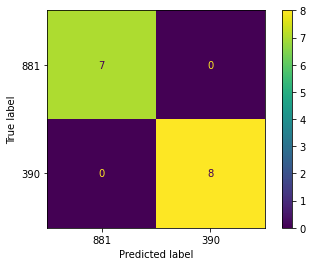

In [10]:
# Plot Confusion Matrix:
model.cm()

This model by default test all hyperparameter configurations, to check the selected configuration (check teh report for higher accuracy):

In [11]:
model.best_config

(100, 'add', 'gru')

Moreover, you can repeat the classification in a number of rounds with increasing random seed:

In [12]:
model.test(rounds=3)

[MARC:] Creating a model to test set
[MARC:] Evaluation Config - 100-add-gru


Model Testing:   0%|          | 0/3 [00:00<?, ?it/s]

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 261ms/steps: 28.3537 - acc: 0.58
TRAIN		acc: 0.741935	acc_top5: 1.000000	f1_macro: 0.704762	prec_macro: 0.840000	rec_macro: 0.714286
1/1 [==============================] - 0s 127ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 2s 2s/step - loss: 28.3537 - acc: 0.5806 - val_loss: 27.7336 - val_acc: 0.7333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 40ms/stepss: 27.7506 - acc: 0.61
TRAIN		acc: 0.870968	acc_top5: 1.000000	f1_macro: 0.864035	prec_macro: 0.904762	rec_macro: 0.857143
1/1 [==============================] - 0s 29ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 0s 312ms/step - loss: 27.7506 - acc: 0.6129 - val_loss: 27.1311 - val_acc: 0.7333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 290ms/steps: 28.3651 - acc: 0.48
TRAIN		acc: 0.677419	acc_top5: 1.000000	f1_macro: 0.608586	prec_macro: 0.814815	rec_macro: 0.642857
1/1 [==============================] - 0s 158ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 3s 3s/step - loss: 28.3651 - acc: 0.4839 - val_loss: 27.7496 - val_acc: 0.5333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 42ms/stepss: 27.7558 - acc: 0.58
TRAIN		acc: 0.806452	acc_top5: 1.000000	f1_macro: 0.788636	prec_macro: 0.869565	rec_macro: 0.785714
1/1 [==============================] - 0s 38ms/step
TEST		acc: 0.533333	acc_top5: 1.000000	f1_macro: 0.347826	prec_macro: 0.766667	rec_macro: 0.500000
1/1 [==============================] - 0s 301ms/step - loss: 27.7558 - acc: 0.5806 - val_loss: 27.1431 - val_acc: 0.5333
===== Training Epoch 3 =

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 320ms/steps: 28.3495 - acc: 0.67
TRAIN		acc: 0.838710	acc_top5: 1.000000	f1_macro: 0.838036	prec_macro: 0.837500	rec_macro: 0.840336
1/1 [==============================] - 0s 166ms/step
TEST		acc: 0.600000	acc_top5: 1.000000	f1_macro: 0.598214	prec_macro: 0.598214	rec_macro: 0.598214
1/1 [==============================] - 3s 3s/step - loss: 28.3495 - acc: 0.6774 - val_loss: 27.7728 - val_acc: 0.6000
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 37ms/stepss: 27.7304 - acc: 0.74
TRAIN		acc: 0.967742	acc_top5: 1.000000	f1_macro: 0.967607	prec_macro: 0.966667	rec_macro: 0.970588
1/1 [==============================] - 0s 38ms/step
TEST		acc: 0.600000	acc_top5: 1.000000	f1_macro: 0.598214	prec_macro: 0.598214	rec_macro: 0.598214
1/1 [==============================] - 0s 266ms/step - loss: 27.7304 - acc: 0.7419 - val_loss: 27.1690 - val_acc: 0.6000
===== Training Epoch 3 =

(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0       1.0            1.0                1.0              1.0           1.0   
 1       1.0            1.0                1.0              1.0           1.0   
 2       1.0            1.0                1.0              1.0           1.0   
 
    f1_macro     clstime  
 0       1.0  201250.305  
 1       1.0  211932.515  
 2       1.0  223253.654  ,
 array([[5.6651433e-04, 9.9943352e-01],
        [8.0264499e-03, 9.9197352e-01],
        [1.8863132e-03, 9.9811375e-01],
        [2.4714947e-02, 9.7528505e-01],
        [9.1735232e-01, 8.2647711e-02],
        [9.5499998e-01, 4.5000061e-02],
        [9.1258031e-01, 8.7419711e-02],
        [9.9697435e-01, 3.0256321e-03],
        [8.2169616e-01, 1.7830388e-01],
        [9.1273481e-01, 8.7265208e-02],
        [9.9702388e-01, 2.9761621e-03],
        [3.7747170e-03, 9.9622524e-01],
        [4.0573914e-02, 9.5942611e-01],
        [2.0550643e-03, 9.9794489e-01],
     

In [13]:
## We can visualize the test report (the same on most models):
model.test_report

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,201250.305
1,1.0,1.0,1.0,1.0,1.0,1.0,211932.515
2,1.0,1.0,1.0,1.0,1.0,1.0,223253.654


In [14]:
# And show the mean results
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,212145.491333


You may want to use the classifier in a traditional way:

In [15]:
from matclassification.methods import MARC

model = MARC()

# Each classifier expect a ceirtain input format. If you want to change, check the 'xy' method:
(keys, vocab_size, num_classes, max_length, le, x_train, x_test, y_train, y_test) = model.xy(train, test)

# You can add method variables with this:
model.add_config(keys=keys, 
                 vocab_size=vocab_size,
                 num_classes=num_classes,
                 max_length=max_length)
model.le = le # The label encoder

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)

2024-06-30 19:03:38.013530

[MARC:] Building model

###########    DATA PREPARATION      ###########
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'space': 189 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'time': 580 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'day': 7 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'poi': 172 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'type': 97 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'root_type': 10 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'rating': 44 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Attribute 'weather': 6 unique values
[    INFO    ] 2024-06-30 19:03:38 :: Total of attribute/value pairs: 1105
[[[    INFO    ] 2024-06-30 19:03:38 :: Processing trajectory 46/46. 
[    INFO    ] 2024-06-30 19:03:38 :: Loading data from files ... DONE!
[    INFO    ] 2024-06-30 19:03:38 :: Trajectories:  46
[    INFO    ] 2024-06-30 19:03

===== Training Epoch 1 =====
Epoch 1/1000
1/1 [==============================] - 0s 289ms/steps: 32.5826 - acc: 0.58
TRAIN		acc: 0.838710	acc_top5: 1.000000	f1_macro: 0.827202	prec_macro: 0.886364	rec_macro: 0.821429
1/1 [==============================] - 0s 143ms/step
TEST		acc: 0.733333	acc_top5: 1.000000	f1_macro: 0.700000	prec_macro: 0.833333	rec_macro: 0.714286
1/1 [==============================] - 3s 3s/step - loss: 32.5826 - acc: 0.5806 - val_loss: 31.7694 - val_acc: 0.7333
===== Training Epoch 2 =====
Epoch 2/1000
1/1 [==============================] - 0s 40ms/stepss: 31.7628 - acc: 0.70
TRAIN		acc: 0.838710	acc_top5: 1.000000	f1_macro: 0.827202	prec_macro: 0.886364	rec_macro: 0.821429
1/1 [==============================] - 0s 38ms/step
TEST		acc: 0.866667	acc_top5: 1.000000	f1_macro: 0.861111	prec_macro: 0.900000	rec_macro: 0.857143
1/1 [==============================] - 0s 405ms/step - loss: 31.7628 - acc: 0.7097 - val_loss: 30.9685 - val_acc: 0.8667
===== Training Epoch 3 =

In [16]:
summary

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro
0,1.0,1.0,1.0,1.0,1.0,1.0


#### 2.1.2. DeepeST


In [17]:
from matclassification.methods import DeepeST

model = DeepeST()
model.prepare_input(train, test)
model.train()
model.test()

2024-06-30 19:03:49.334432

[DeepeST:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 151 unique values
Attribute 'time': 434 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 137 unique values
Attribute 'type': 85 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 41 unique values
Attribute 'weather': 5 unique values
Attribute 'tid': 31 unique values
Total of attribute/value pairs: 901


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 31
... tid_1: 15
col_name: ['space', 'time', 'day', 'poi', 'type', 'root_type', 'rating', 'weather', 'tid', 'label']...
... num_classes: 2
... max_lenght: 38
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather


###########      Generating y_train

[DeepeST:] Model Training:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5561 - acc: 0.5161 - val_loss: 62.9719 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 320ms/step - loss: 62.9639 - acc: 0.5484 - val_loss: 61.4122 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 423ms/step - loss: 61.4005 - acc: 0.5484 - val_loss: 59.8795 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 299ms/step - loss: 59.8584 - acc: 0.5806 - val_loss: 58.3747 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 287ms/step - loss: 58.3573 - acc: 0.6129 - val_loss: 56.8936 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 299ms/step - loss: 56.8540 - acc: 0.6452 - val_loss: 55.4394 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 0s 308ms/step - loss: 55.4279 - acc: 0.6774 - val_loss: 54.0139 - val_acc: 0.6000
Epoch 8/1000
1/1 [==============================] - 0s 134ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5952 - acc: 0.6129 - val_loss: 63.0092 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 388ms/step - loss: 63.0057 - acc: 0.5806 - val_loss: 61.4453 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 377ms/step - loss: 61.4232 - acc: 0.6129 - val_loss: 59.9072 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 339ms/step - loss: 59.8903 - acc: 0.5806 - val_loss: 58.3979 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 218ms/step - loss: 58.3938 - acc: 0.6774 - val_loss: 56.9119 - val_acc: 0.8000
Epoch 6/1000
1/1 [==============================] - 0s 316ms/step - loss: 56.8663 - acc: 0.8710 - val_loss: 55.4537 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 0s 306ms/step - loss: 55.4453 - acc: 0.9032 - val_loss: 54.0230 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 197ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.6209 - acc: 0.5161 - val_loss: 63.0133 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 403ms/step - loss: 62.9875 - acc: 0.6129 - val_loss: 61.4340 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 287ms/step - loss: 61.4134 - acc: 0.6774 - val_loss: 59.8771 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 413ms/step - loss: 59.8413 - acc: 0.7097 - val_loss: 58.3449 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 0s 304ms/step - loss: 58.3369 - acc: 0.7742 - val_loss: 56.8392 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 362ms/step - loss: 56.7706 - acc: 0.9677 - val_loss: 55.3615 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 282ms/step - loss: 55.3848 - acc: 0.8710 - val_loss: 53.9131 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 211ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5439 - acc: 0.5161 - val_loss: 62.9390 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 376ms/step - loss: 62.8992 - acc: 0.5806 - val_loss: 61.3427 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 401ms/step - loss: 61.3089 - acc: 0.8065 - val_loss: 59.7614 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 0s 368ms/step - loss: 59.7414 - acc: 0.9032 - val_loss: 58.2186 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 349ms/step - loss: 58.1924 - acc: 0.9355 - val_loss: 56.7034 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 316ms/step - loss: 56.6349 - acc: 1.0000 - val_loss: 55.2182 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 192ms/step - loss: 55.1982 - acc: 0.9677 - val_loss: 53.7640 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 222ms/step

1/1 [==============================] - 0s 483ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5574 - acc: 0.3871 - val_loss: 62.9305 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 451ms/step - loss: 62.8977 - acc: 0.5806 - val_loss: 61.2893 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 0s 372ms/step - loss: 61.2810 - acc: 0.7097 - val_loss: 59.6895 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 298ms/step - loss: 59.6636 - acc: 0.9032 - val_loss: 58.1301 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 316ms/step - loss: 58.1267 - acc: 1.0000 - val_loss: 56.6016 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 262ms/step - loss: 56.5303 - acc: 1.0000 - val_loss: 55.1134 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 226ms/step - loss: 55.0871 - acc: 0.9677 - val_loss: 53.6551 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 338ms/step

1/1 [==============================] - 1s 673ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5679 - acc: 0.4194 - val_loss: 62.9857 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 439ms/step - loss: 62.9908 - acc: 0.6452 - val_loss: 61.4277 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 317ms/step - loss: 61.4279 - acc: 0.5484 - val_loss: 59.8968 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 325ms/step - loss: 59.8917 - acc: 0.5806 - val_loss: 58.3975 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 405ms/step - loss: 58.3776 - acc: 0.6129 - val_loss: 56.9246 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 313ms/step - loss: 56.8985 - acc: 0.5484 - val_loss: 55.4782 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 0s 377ms/step - loss: 55.4624 - acc: 0.5806 - val_loss: 54.0585 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 0s 226ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.6466 - acc: 0.5484 - val_loss: 63.0581 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 406ms/step - loss: 63.0375 - acc: 0.6774 - val_loss: 61.4932 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 399ms/step - loss: 61.4771 - acc: 0.5806 - val_loss: 59.9534 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 355ms/step - loss: 59.9516 - acc: 0.6129 - val_loss: 58.4405 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 316ms/step - loss: 58.4196 - acc: 0.6129 - val_loss: 56.9513 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 371ms/step - loss: 56.9040 - acc: 0.8387 - val_loss: 55.4890 - val_acc: 0.6000
Epoch 7/1000
1/1 [==============================] - 0s 259ms/step - loss: 55.4862 - acc: 0.7419 - val_loss: 54.0547 - val_acc: 0.8000
Epoch 8/1000
1/1 [==============================] - 0s 218ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5642 - acc: 0.4516 - val_loss: 62.9578 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 447ms/step - loss: 62.9487 - acc: 0.5806 - val_loss: 61.3811 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 437ms/step - loss: 61.3748 - acc: 0.6129 - val_loss: 59.8261 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 251ms/step - loss: 59.8035 - acc: 0.8065 - val_loss: 58.3012 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 0s 350ms/step - loss: 58.2915 - acc: 0.8710 - val_loss: 56.8013 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 214ms/step - loss: 56.7608 - acc: 0.9677 - val_loss: 55.3295 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 0s 174ms/step - loss: 55.3337 - acc: 0.8387 - val_loss: 53.8858 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 0s 213ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5713 - acc: 0.4516 - val_loss: 62.9612 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 410ms/step - loss: 62.9379 - acc: 0.5484 - val_loss: 61.3662 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 400ms/step - loss: 61.3562 - acc: 0.6452 - val_loss: 59.7915 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 0s 378ms/step - loss: 59.7822 - acc: 0.8387 - val_loss: 58.2512 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 325ms/step - loss: 58.2229 - acc: 0.9355 - val_loss: 56.7390 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 169ms/step - loss: 56.6650 - acc: 1.0000 - val_loss: 55.2553 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 365ms/step - loss: 55.2684 - acc: 0.9355 - val_loss: 53.8046 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 264ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 64.5175 - acc: 0.5161 - val_loss: 62.9325 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 377ms/step - loss: 62.9152 - acc: 0.5484 - val_loss: 61.3116 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 318ms/step - loss: 61.2759 - acc: 0.6129 - val_loss: 59.7208 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 0s 377ms/step - loss: 59.7117 - acc: 0.8065 - val_loss: 58.1755 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 338ms/step - loss: 58.1700 - acc: 0.8387 - val_loss: 56.6620 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 272ms/step - loss: 56.5879 - acc: 0.9677 - val_loss: 55.1837 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 304ms/step - loss: 55.1843 - acc: 0.9355 - val_loss: 53.7391 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 279ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 181.3713 - acc: 0.3871 - val_loss: 175.1026 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 382ms/step - loss: 175.0977 - acc: 0.5484 - val_loss: 168.9691 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 397ms/step - loss: 168.9539 - acc: 0.5484 - val_loss: 162.9953 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 378ms/step - loss: 162.9850 - acc: 0.5484 - val_loss: 157.2022 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 315ms/step - loss: 157.2020 - acc: 0.5484 - val_loss: 151.5502 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 270ms/step - loss: 151.5310 - acc: 0.6129 - val_loss: 146.0522 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 0s 285ms/step - loss: 146.0377 - acc: 0.6774 - val_loss: 140.7138 - val_acc: 0.6000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 181.4371 - acc: 0.4839 - val_loss: 175.1627 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 370ms/step - loss: 175.1508 - acc: 0.5484 - val_loss: 169.0155 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 354ms/step - loss: 168.9890 - acc: 0.6452 - val_loss: 163.0242 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 381ms/step - loss: 163.0075 - acc: 0.6774 - val_loss: 157.2094 - val_acc: 0.8000
Epoch 5/1000
1/1 [==============================] - 0s 229ms/step - loss: 157.2000 - acc: 0.7419 - val_loss: 151.5373 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 272ms/step - loss: 151.4841 - acc: 0.9677 - val_loss: 146.0243 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 283ms/step - loss: 146.0038 - acc: 0.9032 - val_loss: 140.6730 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 181.4291 - acc: 0.4839 - val_loss: 175.1478 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 423ms/step - loss: 175.1339 - acc: 0.5484 - val_loss: 168.9776 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 415ms/step - loss: 168.9531 - acc: 0.6129 - val_loss: 162.9649 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 0s 267ms/step - loss: 162.9567 - acc: 0.8710 - val_loss: 157.1371 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 276ms/step - loss: 157.1454 - acc: 1.0000 - val_loss: 151.4533 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 235ms/step - loss: 151.4121 - acc: 1.0000 - val_loss: 145.9261 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 248ms/step - loss: 145.9017 - acc: 0.9677 - val_loss: 140.5553 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 181.2305 - acc: 0.4516 - val_loss: 174.9312 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 359ms/step - loss: 174.9140 - acc: 0.5484 - val_loss: 168.7328 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 0s 275ms/step - loss: 168.7099 - acc: 0.8387 - val_loss: 162.7107 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 369ms/step - loss: 162.7275 - acc: 0.9032 - val_loss: 156.8690 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 309ms/step - loss: 156.8698 - acc: 1.0000 - val_loss: 151.1778 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 338ms/step - loss: 151.1132 - acc: 1.0000 - val_loss: 145.6522 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 177ms/step - loss: 145.6409 - acc: 0.9677 - val_loss: 140.2841 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 181.3318 - acc: 0.5161 - val_loss: 175.0653 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 388ms/step - loss: 175.0399 - acc: 0.5484 - val_loss: 168.8033 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 414ms/step - loss: 168.7729 - acc: 0.9677 - val_loss: 162.7843 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 0s 377ms/step - loss: 162.8159 - acc: 0.8065 - val_loss: 156.9237 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 335ms/step - loss: 156.9418 - acc: 1.0000 - val_loss: 151.2286 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 314ms/step - loss: 151.1726 - acc: 1.0000 - val_loss: 145.7047 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 272ms/step - loss: 145.6911 - acc: 1.0000 - val_loss: 140.3303 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 181.3831 - acc: 0.5161 - val_loss: 175.1129 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 411ms/step - loss: 175.1061 - acc: 0.6129 - val_loss: 168.9800 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 392ms/step - loss: 168.9671 - acc: 0.6129 - val_loss: 163.0062 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 288ms/step - loss: 163.0072 - acc: 0.5484 - val_loss: 157.2156 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 382ms/step - loss: 157.2168 - acc: 0.5484 - val_loss: 151.5680 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 241ms/step - loss: 151.5455 - acc: 0.6774 - val_loss: 146.0741 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 0s 301ms/step - loss: 146.0667 - acc: 0.6452 - val_loss: 140.7428 - val_acc: 0.6667
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 181.3240 - acc: 0.4516 - val_loss: 175.0362 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 475ms/step - loss: 175.0347 - acc: 0.5806 - val_loss: 168.8998 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 329ms/step - loss: 168.8869 - acc: 0.5484 - val_loss: 162.9188 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 383ms/step - loss: 162.9126 - acc: 0.6452 - val_loss: 157.1100 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 501ms/step - loss: 157.1100 - acc: 0.7097 - val_loss: 151.4489 - val_acc: 0.6000
Epoch 6/1000
1/1 [==============================] - 0s 314ms/step - loss: 151.4197 - acc: 0.8065 - val_loss: 145.9433 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 0s 267ms/step - loss: 145.9285 - acc: 0.9355 - val_loss: 140.5953 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 181.1546 - acc: 0.2581 - val_loss: 174.8554 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 0s 486ms/step - loss: 174.8490 - acc: 0.5806 - val_loss: 168.7100 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 390ms/step - loss: 168.6839 - acc: 0.6774 - val_loss: 162.7114 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 386ms/step - loss: 162.6935 - acc: 0.7742 - val_loss: 156.8883 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 0s 205ms/step - loss: 156.8837 - acc: 0.8710 - val_loss: 151.2112 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 472ms/step - loss: 151.1606 - acc: 1.0000 - val_loss: 145.6893 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 238ms/step - loss: 145.6757 - acc: 0.9677 - val_loss: 140.3271 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 181.2425 - acc: 0.5484 - val_loss: 174.9268 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 535ms/step - loss: 174.9132 - acc: 0.7097 - val_loss: 168.7473 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 513ms/step - loss: 168.7609 - acc: 0.8065 - val_loss: 162.7253 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 435ms/step - loss: 162.7195 - acc: 0.8387 - val_loss: 156.8842 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 266ms/step - loss: 156.8899 - acc: 0.9677 - val_loss: 151.1910 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 211ms/step - loss: 151.1529 - acc: 1.0000 - val_loss: 145.6544 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 355ms/step - loss: 145.6682 - acc: 0.9677 - val_loss: 140.2838 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 181.3662 - acc: 0.5161 - val_loss: 175.1379 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 712ms/step - loss: 175.1245 - acc: 0.5484 - val_loss: 168.8366 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 502ms/step - loss: 168.8405 - acc: 0.9355 - val_loss: 162.8087 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 605ms/step - loss: 162.8511 - acc: 0.7419 - val_loss: 156.9495 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 366ms/step - loss: 156.9946 - acc: 1.0000 - val_loss: 151.2447 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 320ms/step - loss: 151.2121 - acc: 1.0000 - val_loss: 145.7233 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 385ms/step - loss: 145.7090 - acc: 0.9677 - val_loss: 140.3666 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.4652 - acc: 0.5161 - val_loss: 318.4462 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 664ms/step - loss: 318.4373 - acc: 0.5484 - val_loss: 304.8125 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 403ms/step - loss: 304.8067 - acc: 0.5484 - val_loss: 291.6195 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 598ms/step - loss: 291.6035 - acc: 0.5484 - val_loss: 278.9196 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 458ms/step - loss: 278.9074 - acc: 0.6129 - val_loss: 266.6168 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 470ms/step - loss: 266.5942 - acc: 0.7097 - val_loss: 254.7388 - val_acc: 0.6667
Epoch 7/1000
1/1 [==============================] - 0s 299ms/step - loss: 254.7262 - acc: 0.7419 - val_loss: 243.3044 - val_acc: 0.8667
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.4597 - acc: 0.4194 - val_loss: 318.4289 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 668ms/step - loss: 318.4268 - acc: 0.5484 - val_loss: 304.7828 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 551ms/step - loss: 304.7877 - acc: 0.5484 - val_loss: 291.5701 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 555ms/step - loss: 291.5632 - acc: 0.7097 - val_loss: 278.8542 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 0s 495ms/step - loss: 278.8542 - acc: 0.8065 - val_loss: 266.5328 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 579ms/step - loss: 266.5176 - acc: 0.9677 - val_loss: 254.6364 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 330ms/step - loss: 254.6287 - acc: 0.9677 - val_loss: 243.1766 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.4729 - acc: 0.5806 - val_loss: 318.4558 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 688ms/step - loss: 318.4357 - acc: 0.5484 - val_loss: 304.7701 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 0s 497ms/step - loss: 304.7567 - acc: 0.7419 - val_loss: 291.5294 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 638ms/step - loss: 291.5235 - acc: 0.8710 - val_loss: 278.8000 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 359ms/step - loss: 278.8081 - acc: 0.9355 - val_loss: 266.4683 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 303ms/step - loss: 266.4395 - acc: 1.0000 - val_loss: 254.5674 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 394ms/step - loss: 254.5322 - acc: 1.0000 - val_loss: 243.1069 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.4667 - acc: 0.4194 - val_loss: 318.4230 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 721ms/step - loss: 318.4042 - acc: 0.5484 - val_loss: 304.6913 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 511ms/step - loss: 304.6902 - acc: 0.9355 - val_loss: 291.4333 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 538ms/step - loss: 291.4351 - acc: 0.9677 - val_loss: 278.6815 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 518ms/step - loss: 278.6797 - acc: 0.9677 - val_loss: 266.3422 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 425ms/step - loss: 266.2883 - acc: 1.0000 - val_loss: 254.4265 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 298ms/step - loss: 254.4011 - acc: 1.0000 - val_loss: 242.9468 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.3335 - acc: 0.6129 - val_loss: 318.3060 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 718ms/step - loss: 318.2751 - acc: 0.5484 - val_loss: 304.5205 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 535ms/step - loss: 304.5420 - acc: 0.8387 - val_loss: 291.2564 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 479ms/step - loss: 291.2555 - acc: 0.9355 - val_loss: 278.4929 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 571ms/step - loss: 278.4684 - acc: 1.0000 - val_loss: 266.1604 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 435ms/step - loss: 266.1006 - acc: 1.0000 - val_loss: 254.2444 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 456ms/step - loss: 254.2193 - acc: 0.9677 - val_loss: 242.7623 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.4581 - acc: 0.3871 - val_loss: 318.4397 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 667ms/step - loss: 318.4385 - acc: 0.5484 - val_loss: 304.8098 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 546ms/step - loss: 304.8002 - acc: 0.5484 - val_loss: 291.6168 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 377ms/step - loss: 291.6056 - acc: 0.5484 - val_loss: 278.9220 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 323ms/step - loss: 278.9109 - acc: 0.5484 - val_loss: 266.6201 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 453ms/step - loss: 266.5905 - acc: 0.6452 - val_loss: 254.7465 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 0s 190ms/step - loss: 254.7294 - acc: 0.6452 - val_loss: 243.3070 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 332.5738 - acc: 0.5484 - val_loss: 318.5529 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 543ms/step - loss: 318.5540 - acc: 0.5484 - val_loss: 304.8965 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 644ms/step - loss: 304.8961 - acc: 0.5484 - val_loss: 291.6681 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 617ms/step - loss: 291.6565 - acc: 0.6452 - val_loss: 278.9388 - val_acc: 0.6000
Epoch 5/1000
1/1 [==============================] - 0s 472ms/step - loss: 278.9323 - acc: 0.7097 - val_loss: 266.6058 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 457ms/step - loss: 266.5617 - acc: 0.9677 - val_loss: 254.7047 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 0s 295ms/step - loss: 254.7056 - acc: 0.9032 - val_loss: 243.2435 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 332.5667 - acc: 0.4194 - val_loss: 318.5391 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 680ms/step - loss: 318.5151 - acc: 0.5484 - val_loss: 304.8541 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 719ms/step - loss: 304.8600 - acc: 0.6129 - val_loss: 291.6058 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 510ms/step - loss: 291.6119 - acc: 0.8387 - val_loss: 278.8662 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 519ms/step - loss: 278.8795 - acc: 0.9677 - val_loss: 266.5211 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 277ms/step - loss: 266.5029 - acc: 0.9677 - val_loss: 254.6033 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 592ms/step - loss: 254.6134 - acc: 0.9677 - val_loss: 243.1244 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 332.4017 - acc: 0.3871 - val_loss: 318.3543 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 588ms/step - loss: 318.3342 - acc: 0.5484 - val_loss: 304.6268 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 714ms/step - loss: 304.6230 - acc: 0.7742 - val_loss: 291.3726 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 613ms/step - loss: 291.3939 - acc: 0.9032 - val_loss: 278.6189 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 407ms/step - loss: 278.6401 - acc: 1.0000 - val_loss: 266.2682 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 596ms/step - loss: 266.2313 - acc: 1.0000 - val_loss: 254.3614 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 539ms/step - loss: 254.3510 - acc: 0.9677 - val_loss: 242.8916 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 332.3990 - acc: 0.5161 - val_loss: 318.3849 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 788ms/step - loss: 318.3648 - acc: 0.5484 - val_loss: 304.6100 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 677ms/step - loss: 304.6346 - acc: 0.9355 - val_loss: 291.3552 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 0s 489ms/step - loss: 291.3811 - acc: 0.8710 - val_loss: 278.5994 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 521ms/step - loss: 278.5948 - acc: 1.0000 - val_loss: 266.2806 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 355ms/step - loss: 266.2138 - acc: 0.9677 - val_loss: 254.3712 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 666ms/step - loss: 254.3403 - acc: 0.9677 - val_loss: 242.8895 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.6541 - acc: 0.7419 - val_loss: 486.8661 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 731ms/step - loss: 486.8604 - acc: 0.5484 - val_loss: 462.8448 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 610ms/step - loss: 462.8366 - acc: 0.5484 - val_loss: 439.7193 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 593ms/step - loss: 439.7022 - acc: 0.5806 - val_loss: 417.6223 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 0s 430ms/step - loss: 417.6154 - acc: 0.6129 - val_loss: 396.3373 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 1s 579ms/step - loss: 396.3014 - acc: 0.7419 - val_loss: 375.9167 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 0s 234ms/step - loss: 375.9107 - acc: 0.7419 - val_loss: 356.3733 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.4467 - acc: 0.5806 - val_loss: 486.6439 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 792ms/step - loss: 486.6381 - acc: 0.5484 - val_loss: 462.6022 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 691ms/step - loss: 462.5889 - acc: 0.5484 - val_loss: 439.4618 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 615ms/step - loss: 439.4410 - acc: 0.7742 - val_loss: 417.3409 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 609ms/step - loss: 417.3207 - acc: 0.9355 - val_loss: 396.0350 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 599ms/step - loss: 395.9871 - acc: 1.0000 - val_loss: 375.6025 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 315ms/step - loss: 375.5904 - acc: 0.9677 - val_loss: 356.0544 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.2755 - acc: 0.5484 - val_loss: 486.4656 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 719ms/step - loss: 486.4514 - acc: 0.5484 - val_loss: 462.3803 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 694ms/step - loss: 462.3948 - acc: 0.7742 - val_loss: 439.2138 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 585ms/step - loss: 439.2060 - acc: 0.9677 - val_loss: 417.0811 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 511ms/step - loss: 417.0662 - acc: 0.9677 - val_loss: 395.7708 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 569ms/step - loss: 395.7126 - acc: 1.0000 - val_loss: 375.3252 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 382ms/step - loss: 375.3042 - acc: 0.9677 - val_loss: 355.7610 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.5605 - acc: 0.6452 - val_loss: 486.7233 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 722ms/step - loss: 486.7077 - acc: 0.5484 - val_loss: 462.6081 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 681ms/step - loss: 462.6198 - acc: 0.9355 - val_loss: 439.4146 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 583ms/step - loss: 439.3983 - acc: 0.9355 - val_loss: 417.2624 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 284ms/step - loss: 417.2476 - acc: 0.9355 - val_loss: 395.9128 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 407ms/step - loss: 395.8489 - acc: 1.0000 - val_loss: 375.4308 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 536ms/step - loss: 375.4154 - acc: 1.0000 - val_loss: 355.8583 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 511.4420 - acc: 0.3871 - val_loss: 486.7245 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 991ms/step - loss: 486.6710 - acc: 0.5484 - val_loss: 462.4522 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 719ms/step - loss: 462.4719 - acc: 1.0000 - val_loss: 439.3015 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 593ms/step - loss: 439.3122 - acc: 0.7742 - val_loss: 417.1129 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 441ms/step - loss: 417.1005 - acc: 1.0000 - val_loss: 395.7901 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 385ms/step - loss: 395.7374 - acc: 1.0000 - val_loss: 375.3678 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 551ms/step - loss: 375.3195 - acc: 0.9677 - val_loss: 355.8218 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.4317 - acc: 0.4516 - val_loss: 486.6335 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 809ms/step - loss: 486.6236 - acc: 0.5484 - val_loss: 462.6179 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 711ms/step - loss: 462.6096 - acc: 0.5484 - val_loss: 439.5038 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 680ms/step - loss: 439.4868 - acc: 0.5484 - val_loss: 417.4047 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 576ms/step - loss: 417.3911 - acc: 0.5806 - val_loss: 396.1141 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 285ms/step - loss: 396.0768 - acc: 0.7742 - val_loss: 375.6985 - val_acc: 0.6000
Epoch 7/1000
1/1 [==============================] - 0s 396ms/step - loss: 375.6884 - acc: 0.7419 - val_loss: 356.1740 - val_acc: 0.8667
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.1757 - acc: 0.4194 - val_loss: 486.3673 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 776ms/step - loss: 486.3552 - acc: 0.5484 - val_loss: 462.3478 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 733ms/step - loss: 462.3389 - acc: 0.5484 - val_loss: 439.2172 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 375ms/step - loss: 439.2009 - acc: 0.7097 - val_loss: 417.1068 - val_acc: 0.8000
Epoch 5/1000
1/1 [==============================] - 0s 349ms/step - loss: 417.1055 - acc: 0.7742 - val_loss: 395.8161 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 473ms/step - loss: 395.7741 - acc: 0.9677 - val_loss: 375.4032 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 611ms/step - loss: 375.3948 - acc: 0.9355 - val_loss: 355.8812 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.4805 - acc: 0.4516 - val_loss: 486.6686 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 816ms/step - loss: 486.6568 - acc: 0.5484 - val_loss: 462.5913 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 622ms/step - loss: 462.5803 - acc: 0.7419 - val_loss: 439.4231 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 561ms/step - loss: 439.4278 - acc: 0.9677 - val_loss: 417.2850 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 604ms/step - loss: 417.2872 - acc: 0.9355 - val_loss: 395.9690 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 409ms/step - loss: 395.9329 - acc: 1.0000 - val_loss: 375.5292 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 436ms/step - loss: 375.5402 - acc: 1.0000 - val_loss: 355.9874 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.4553 - acc: 0.4839 - val_loss: 486.6505 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 704ms/step - loss: 486.6173 - acc: 0.5484 - val_loss: 462.5158 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 543ms/step - loss: 462.5265 - acc: 0.9355 - val_loss: 439.3372 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 655ms/step - loss: 439.3503 - acc: 0.9032 - val_loss: 417.1783 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 655ms/step - loss: 417.1746 - acc: 0.9677 - val_loss: 395.8409 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 670ms/step - loss: 395.7883 - acc: 1.0000 - val_loss: 375.3790 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 341ms/step - loss: 375.3733 - acc: 0.9677 - val_loss: 355.8101 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 511.2351 - acc: 0.5484 - val_loss: 486.4635 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 968ms/step - loss: 486.4282 - acc: 0.5484 - val_loss: 462.2745 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 640ms/step - loss: 462.2811 - acc: 0.8387 - val_loss: 439.0793 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 677ms/step - loss: 439.0971 - acc: 0.8387 - val_loss: 416.9111 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 534ms/step - loss: 416.8750 - acc: 1.0000 - val_loss: 395.6206 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 662ms/step - loss: 395.5445 - acc: 1.0000 - val_loss: 375.1864 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 565ms/step - loss: 375.1494 - acc: 0.9677 - val_loss: 355.6354 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.4105 - acc: 0.4839 - val_loss: 675.8151 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 739ms/step - loss: 675.8104 - acc: 0.5484 - val_loss: 638.5835 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 673ms/step - loss: 638.5759 - acc: 0.5484 - val_loss: 602.9236 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 0s 322ms/step - loss: 602.9091 - acc: 0.5484 - val_loss: 569.0475 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 503ms/step - loss: 569.0333 - acc: 0.6452 - val_loss: 536.5853 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 390ms/step - loss: 536.5421 - acc: 0.8065 - val_loss: 505.6254 - val_acc: 0.6000
Epoch 7/1000
1/1 [==============================] - 1s 686ms/step - loss: 505.6103 - acc: 0.8387 - val_loss: 476.2065 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.5026 - acc: 0.4839 - val_loss: 675.9103 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 787ms/step - loss: 675.8958 - acc: 0.5484 - val_loss: 638.6528 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 755ms/step - loss: 638.6298 - acc: 0.5806 - val_loss: 602.9472 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 1s 743ms/step - loss: 602.9420 - acc: 0.7742 - val_loss: 569.0349 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 552ms/step - loss: 569.0392 - acc: 0.9355 - val_loss: 536.5502 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 712ms/step - loss: 536.5067 - acc: 1.0000 - val_loss: 505.5799 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 391ms/step - loss: 505.5697 - acc: 1.0000 - val_loss: 476.1558 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.2352 - acc: 0.6452 - val_loss: 675.6418 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 826ms/step - loss: 675.6242 - acc: 0.5484 - val_loss: 638.3402 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 768ms/step - loss: 638.3250 - acc: 0.8387 - val_loss: 602.6353 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 643ms/step - loss: 602.6442 - acc: 0.9677 - val_loss: 568.7148 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 396ms/step - loss: 568.7099 - acc: 0.9677 - val_loss: 536.2159 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 609ms/step - loss: 536.1492 - acc: 1.0000 - val_loss: 505.2403 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 416ms/step - loss: 505.2167 - acc: 1.0000 - val_loss: 475.8064 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.5789 - acc: 0.4839 - val_loss: 675.9916 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 970ms/step - loss: 675.9691 - acc: 0.5484 - val_loss: 638.6323 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 810ms/step - loss: 638.6247 - acc: 0.9355 - val_loss: 602.9109 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 674ms/step - loss: 602.9141 - acc: 1.0000 - val_loss: 568.9853 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 755ms/step - loss: 568.9580 - acc: 1.0000 - val_loss: 536.4786 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 487ms/step - loss: 536.3896 - acc: 1.0000 - val_loss: 505.4824 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 669ms/step - loss: 505.4417 - acc: 1.0000 - val_loss: 476.0334 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.3252 - acc: 0.4516 - val_loss: 675.7163 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 675.6967 - acc: 0.5484 - val_loss: 638.3231 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 917ms/step - loss: 638.3497 - acc: 0.7097 - val_loss: 602.5441 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 729ms/step - loss: 602.5557 - acc: 0.9677 - val_loss: 568.6346 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 756ms/step - loss: 568.6040 - acc: 0.9355 - val_loss: 536.1323 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 682ms/step - loss: 536.0458 - acc: 1.0000 - val_loss: 505.1281 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 588ms/step - loss: 505.1002 - acc: 0.9677 - val_loss: 475.7095 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.3359 - acc: 0.5806 - val_loss: 675.7526 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 945ms/step - loss: 675.7415 - acc: 0.5484 - val_loss: 638.5374 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 538ms/step - loss: 638.5305 - acc: 0.5484 - val_loss: 602.8844 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 703ms/step - loss: 602.8759 - acc: 0.5484 - val_loss: 569.0109 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 695ms/step - loss: 569.0054 - acc: 0.5806 - val_loss: 536.5580 - val_acc: 0.6000
Epoch 6/1000
1/1 [==============================] - 1s 754ms/step - loss: 536.5206 - acc: 0.7419 - val_loss: 505.6389 - val_acc: 0.6000
Epoch 7/1000
1/1 [==============================] - 1s 722ms/step - loss: 505.6355 - acc: 0.8065 - val_loss: 476.2643 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 714.1532 - acc: 0.7097 - val_loss: 675.5665 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 675.5696 - acc: 0.5484 - val_loss: 638.3376 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 770ms/step - loss: 638.3337 - acc: 0.5484 - val_loss: 602.6896 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 1s 758ms/step - loss: 602.6697 - acc: 0.8065 - val_loss: 568.8175 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 624ms/step - loss: 568.7990 - acc: 0.9355 - val_loss: 536.3671 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 782ms/step - loss: 536.3180 - acc: 0.9677 - val_loss: 505.4228 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 659ms/step - loss: 505.4263 - acc: 0.9355 - val_loss: 476.0281 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 714.2191 - acc: 0.5161 - val_loss: 675.6033 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 677ms/step - loss: 675.5852 - acc: 0.5484 - val_loss: 638.3226 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 767ms/step - loss: 638.3279 - acc: 0.8065 - val_loss: 602.6099 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 714ms/step - loss: 602.6248 - acc: 0.8387 - val_loss: 568.6860 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 672ms/step - loss: 568.7039 - acc: 0.9677 - val_loss: 536.1906 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 548ms/step - loss: 536.1374 - acc: 1.0000 - val_loss: 505.2331 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 706ms/step - loss: 505.2655 - acc: 0.9355 - val_loss: 475.8223 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] -

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 714.3062 - acc: 0.5484 - val_loss: 675.6776 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 675.6600 - acc: 0.5806 - val_loss: 638.3445 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 992ms/step - loss: 638.3624 - acc: 0.8710 - val_loss: 602.6038 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 586ms/step - loss: 602.6086 - acc: 0.9355 - val_loss: 568.6814 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 710ms/step - loss: 568.6686 - acc: 0.9355 - val_loss: 536.1712 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 534ms/step - loss: 536.1021 - acc: 1.0000 - val_loss: 505.1862 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 692ms/step - loss: 505.1851 - acc: 0.9677 - val_loss: 475.7573 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 714.4495 - acc: 0.5161 - val_loss: 675.9959 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 675.9658 - acc: 0.5484 - val_loss: 638.4797 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 638.5005 - acc: 0.9677 - val_loss: 602.7811 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 925ms/step - loss: 602.8027 - acc: 0.7097 - val_loss: 568.8130 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 831ms/step - loss: 568.8228 - acc: 0.9677 - val_loss: 536.3225 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 845ms/step - loss: 536.2613 - acc: 1.0000 - val_loss: 505.3885 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 833ms/step - loss: 505.3646 - acc: 0.9677 - val_loss: 475.9742 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 53

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 32.6477 - acc: 0.3226 - val_loss: 31.8380 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 871ms/step - loss: 31.8353 - acc: 0.6452 - val_loss: 31.0429 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 793ms/step - loss: 31.0335 - acc: 0.7742 - val_loss: 30.2620 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 1s 706ms/step - loss: 30.2549 - acc: 0.8065 - val_loss: 29.4979 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 1s 694ms/step - loss: 29.4858 - acc: 0.8065 - val_loss: 28.7458 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 396ms/step - loss: 28.7230 - acc: 0.9032 - val_loss: 28.0062 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 0s 443ms/step - loss: 27.9936 - acc: 0.9032 - val_loss: 27.2794 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 862ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 32.5836 - acc: 0.4839 - val_loss: 31.7617 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 793ms/step - loss: 31.7672 - acc: 0.8065 - val_loss: 30.9608 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 781ms/step - loss: 30.9517 - acc: 0.9355 - val_loss: 30.1751 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 782ms/step - loss: 30.1670 - acc: 0.9355 - val_loss: 29.4051 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 1s 871ms/step - loss: 29.4059 - acc: 0.8387 - val_loss: 28.6473 - val_acc: 0.8667
Epoch 6/1000
1/1 [==============================] - 0s 363ms/step - loss: 28.6297 - acc: 0.9355 - val_loss: 27.9014 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 585ms/step - loss: 27.8899 - acc: 0.9355 - val_loss: 27.1694 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 0s 384ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 32.6141 - acc: 0.5484 - val_loss: 31.7805 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 31.7705 - acc: 0.8387 - val_loss: 30.9550 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 747ms/step - loss: 30.9268 - acc: 0.8387 - val_loss: 30.1453 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 826ms/step - loss: 30.1184 - acc: 0.9355 - val_loss: 29.3508 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 814ms/step - loss: 29.3225 - acc: 0.9677 - val_loss: 28.5689 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 603ms/step - loss: 28.5113 - acc: 0.9355 - val_loss: 27.8005 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 475ms/step - loss: 27.7592 - acc: 1.0000 - val_loss: 27.0458 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 331ms/step - 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 32.6186 - acc: 0.5484 - val_loss: 31.7510 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 31.7427 - acc: 0.8710 - val_loss: 30.9115 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 830ms/step - loss: 30.8777 - acc: 0.9032 - val_loss: 30.0891 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 612ms/step - loss: 30.0562 - acc: 0.9355 - val_loss: 29.2812 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 755ms/step - loss: 29.2555 - acc: 0.9355 - val_loss: 28.4861 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 362ms/step - loss: 28.4327 - acc: 1.0000 - val_loss: 27.7080 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 641ms/step - loss: 27.6823 - acc: 1.0000 - val_loss: 26.9485 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 402ms/step - 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 32.6604 - acc: 0.2581 - val_loss: 31.7944 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 948ms/step - loss: 31.7759 - acc: 0.7742 - val_loss: 30.9474 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 720ms/step - loss: 30.9044 - acc: 0.8387 - val_loss: 30.1146 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 832ms/step - loss: 30.0697 - acc: 0.9677 - val_loss: 29.2972 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 875ms/step - loss: 29.2585 - acc: 0.9355 - val_loss: 28.4945 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 602ms/step - loss: 28.4297 - acc: 0.9677 - val_loss: 27.7095 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 344ms/step - loss: 27.6751 - acc: 1.0000 - val_loss: 26.9453 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 373ms/step

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 32.7373 - acc: 0.3871 - val_loss: 31.9364 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 31.9317 - acc: 0.6129 - val_loss: 31.1479 - val_acc: 0.6000
Epoch 3/1000
1/1 [==============================] - 1s 965ms/step - loss: 31.1502 - acc: 0.6452 - val_loss: 30.3740 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 754ms/step - loss: 30.3678 - acc: 0.7097 - val_loss: 29.6160 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 493ms/step - loss: 29.6035 - acc: 0.7419 - val_loss: 28.8715 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 1s 743ms/step - loss: 28.8562 - acc: 0.7419 - val_loss: 28.1391 - val_acc: 0.7333
Epoch 7/1000
1/1 [==============================] - 0s 256ms/step - loss: 28.1222 - acc: 0.7419 - val_loss: 27.4197 - val_acc: 0.7333
Epoch 8/1000
1/1 [==============================] - 0s 458ms/step - 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 672s 672s/step - loss: 32.5581 - acc: 0.5806 - val_loss: 31.7504 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 864ms/step - loss: 31.7561 - acc: 0.7097 - val_loss: 30.9490 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 30.9483 - acc: 0.8387 - val_loss: 30.1634 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 740ms/step - loss: 30.1592 - acc: 0.8065 - val_loss: 29.3932 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 786ms/step - loss: 29.3943 - acc: 0.8387 - val_loss: 28.6348 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 308ms/step - loss: 28.6189 - acc: 0.9677 - val_loss: 27.8893 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 528ms/step - loss: 27.8719 - acc: 0.9677 - val_loss: 27.1564 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 0s 374ms/ste

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 32.6882 - acc: 0.5484 - val_loss: 31.8510 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 704ms/step - loss: 31.8410 - acc: 0.8065 - val_loss: 31.0255 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 31.0259 - acc: 0.8065 - val_loss: 30.2151 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 802ms/step - loss: 30.2107 - acc: 0.9032 - val_loss: 29.4211 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 29.4196 - acc: 0.9032 - val_loss: 28.6401 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 366ms/step - loss: 28.6293 - acc: 0.9677 - val_loss: 27.8728 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 890ms/step - loss: 27.8583 - acc: 0.9677 - val_loss: 27.1210 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 763ms/step - los

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 32.6545 - acc: 0.5161 - val_loss: 31.8068 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 725ms/step - loss: 31.7922 - acc: 0.7419 - val_loss: 30.9684 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 30.9554 - acc: 0.8387 - val_loss: 30.1438 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 983ms/step - loss: 30.1250 - acc: 0.9032 - val_loss: 29.3345 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 841ms/step - loss: 29.3137 - acc: 0.9677 - val_loss: 28.5394 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 546ms/step - loss: 28.5100 - acc: 0.9677 - val_loss: 27.7609 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 507ms/step - loss: 27.7348 - acc: 1.0000 - val_loss: 27.0011 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 256ms/step - 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 32.5670 - acc: 0.6452 - val_loss: 31.7191 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 31.6998 - acc: 0.8710 - val_loss: 30.8782 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 649ms/step - loss: 30.8570 - acc: 0.8710 - val_loss: 30.0525 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 891ms/step - loss: 30.0281 - acc: 0.9032 - val_loss: 29.2410 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 854ms/step - loss: 29.2111 - acc: 0.9677 - val_loss: 28.4427 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 404ms/step - loss: 28.3899 - acc: 1.0000 - val_loss: 27.6608 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 416ms/step - loss: 27.6208 - acc: 0.9677 - val_loss: 26.8997 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 382ms/step - 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9321 - acc: 0.5484 - val_loss: 87.7875 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.7865 - acc: 0.6452 - val_loss: 84.7093 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.7029 - acc: 0.7097 - val_loss: 81.7115 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 81.7047 - acc: 0.7742 - val_loss: 78.8050 - val_acc: 0.7333
Epoch 5/1000
1/1 [==============================] - 1s 593ms/step - loss: 78.7937 - acc: 0.7097 - val_loss: 75.9702 - val_acc: 0.7333
Epoch 6/1000
1/1 [==============================] - 1s 634ms/step - loss: 75.9552 - acc: 0.8710 - val_loss: 73.2133 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 1s 790ms/step - loss: 73.2013 - acc: 0.8710 - val_loss: 70.5356 - val_acc: 0.8000
Epoch 8/1000
1/1 [==============================] - 1s 605ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9464 - acc: 0.3871 - val_loss: 87.7916 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.7872 - acc: 0.9032 - val_loss: 84.7051 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.6985 - acc: 0.7419 - val_loss: 81.6970 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 1s 734ms/step - loss: 81.6830 - acc: 0.8710 - val_loss: 78.7805 - val_acc: 0.7333
Epoch 5/1000
1/1 [==============================] - 1s 816ms/step - loss: 78.7635 - acc: 0.8710 - val_loss: 75.9347 - val_acc: 0.8667
Epoch 6/1000
1/1 [==============================] - 1s 753ms/step - loss: 75.9042 - acc: 0.9355 - val_loss: 73.1629 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 0s 441ms/step - loss: 73.1387 - acc: 0.9355 - val_loss: 70.4692 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 698ms/step - los

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 91.0777 - acc: 0.4516 - val_loss: 87.8741 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.8655 - acc: 0.8387 - val_loss: 84.7549 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 983ms/step - loss: 84.7327 - acc: 0.9355 - val_loss: 81.7164 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 959ms/step - loss: 81.6881 - acc: 0.9677 - val_loss: 78.7656 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 866ms/step - loss: 78.7347 - acc: 0.9355 - val_loss: 75.8832 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 809ms/step - loss: 75.8350 - acc: 1.0000 - val_loss: 73.0789 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 766ms/step - loss: 73.0389 - acc: 1.0000 - val_loss: 70.3602 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 559ms/step - 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.8704 - acc: 0.2581 - val_loss: 87.6415 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.6327 - acc: 0.9032 - val_loss: 84.5010 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.4925 - acc: 0.9677 - val_loss: 81.4430 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 977ms/step - loss: 81.4203 - acc: 0.9677 - val_loss: 78.4755 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 78.4461 - acc: 0.9677 - val_loss: 75.5863 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 988ms/step - loss: 75.5448 - acc: 1.0000 - val_loss: 72.7845 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 482ms/step - loss: 72.7524 - acc: 1.0000 - val_loss: 70.0747 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 551ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9764 - acc: 0.4839 - val_loss: 87.7291 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.7136 - acc: 0.8710 - val_loss: 84.5668 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.5374 - acc: 0.9355 - val_loss: 81.4896 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 81.4592 - acc: 1.0000 - val_loss: 78.5089 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 78.4799 - acc: 1.0000 - val_loss: 75.6176 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 484ms/step - loss: 75.5682 - acc: 1.0000 - val_loss: 72.8207 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 782ms/step - loss: 72.7941 - acc: 1.0000 - val_loss: 70.1194 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 923ms/step - loss: 70.

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9324 - acc: 0.4839 - val_loss: 87.7900 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.7849 - acc: 0.7419 - val_loss: 84.7159 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.7081 - acc: 0.7419 - val_loss: 81.7194 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 81.7061 - acc: 0.7742 - val_loss: 78.8149 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 1s 834ms/step - loss: 78.8030 - acc: 0.7742 - val_loss: 75.9857 - val_acc: 0.7333
Epoch 6/1000
1/1 [==============================] - 0s 354ms/step - loss: 75.9651 - acc: 0.8065 - val_loss: 73.2307 - val_acc: 0.7333
Epoch 7/1000
1/1 [==============================] - 0s 451ms/step - loss: 73.2071 - acc: 0.8387 - val_loss: 70.5552 - val_acc: 0.8000
Epoch 8/1000
1/1 [==============================] - 1s 802ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9817 - acc: 0.5806 - val_loss: 87.8224 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.8224 - acc: 0.6774 - val_loss: 84.7315 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.7229 - acc: 0.7419 - val_loss: 81.7218 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 1s 851ms/step - loss: 81.7110 - acc: 0.8710 - val_loss: 78.8036 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 769ms/step - loss: 78.7923 - acc: 0.9355 - val_loss: 75.9584 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 780ms/step - loss: 75.9365 - acc: 0.9355 - val_loss: 73.1884 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 73.1621 - acc: 0.9677 - val_loss: 70.4977 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 275ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 91.0817 - acc: 0.5806 - val_loss: 87.8926 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.8956 - acc: 0.8065 - val_loss: 84.7697 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 735ms/step - loss: 84.7565 - acc: 0.8710 - val_loss: 81.7294 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 945ms/step - loss: 81.7154 - acc: 0.9355 - val_loss: 78.7797 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 78.7607 - acc: 0.9677 - val_loss: 75.9007 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 75.8646 - acc: 1.0000 - val_loss: 73.0996 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 435ms/step - loss: 73.0834 - acc: 1.0000 - val_loss: 70.3789 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 295ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9286 - acc: 0.6129 - val_loss: 87.7239 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.7091 - acc: 0.8065 - val_loss: 84.5945 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 84.5709 - acc: 0.9032 - val_loss: 81.5488 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 999ms/step - loss: 81.5275 - acc: 0.9677 - val_loss: 78.5944 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 776ms/step - loss: 78.5705 - acc: 0.9677 - val_loss: 75.7130 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 537ms/step - loss: 75.6732 - acc: 1.0000 - val_loss: 72.9115 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 72.8812 - acc: 1.0000 - val_loss: 70.1970 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 596ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 90.9961 - acc: 0.4516 - val_loss: 87.7477 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 87.7469 - acc: 0.7742 - val_loss: 84.5936 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 991ms/step - loss: 84.5865 - acc: 0.9032 - val_loss: 81.5219 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 81.4967 - acc: 0.9677 - val_loss: 78.5454 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 78.5194 - acc: 0.9677 - val_loss: 75.6513 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 700ms/step - loss: 75.6128 - acc: 1.0000 - val_loss: 72.8515 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 731ms/step - loss: 72.8302 - acc: 1.0000 - val_loss: 70.1483 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 296ms/step - loss: 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 166.6162 - acc: 0.2903 - val_loss: 159.5881 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.5915 - acc: 0.7419 - val_loss: 152.7565 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 855ms/step - loss: 152.7569 - acc: 0.8065 - val_loss: 146.1390 - val_acc: 0.8000
Epoch 4/1000
1/1 [==============================] - 1s 859ms/step - loss: 146.1300 - acc: 0.8387 - val_loss: 139.7751 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 139.7699 - acc: 0.8710 - val_loss: 133.6068 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 526ms/step - loss: 133.5849 - acc: 0.9355 - val_loss: 127.6508 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 652ms/step - loss: 127.6346 - acc: 0.9677 - val_loss: 121.9080 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 71

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 166.5005 - acc: 0.8387 - val_loss: 159.4554 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.4523 - acc: 0.8710 - val_loss: 152.6043 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.5951 - acc: 0.9032 - val_loss: 145.9756 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 998ms/step - loss: 145.9627 - acc: 0.9355 - val_loss: 139.5936 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 672ms/step - loss: 139.5791 - acc: 0.9355 - val_loss: 133.4089 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 751ms/step - loss: 133.3734 - acc: 1.0000 - val_loss: 127.4413 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 800ms/step - loss: 127.4066 - acc: 0.9677 - val_loss: 121.6902 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 67

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 166.5737 - acc: 0.4516 - val_loss: 159.4884 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.4839 - acc: 0.8065 - val_loss: 152.6044 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.5988 - acc: 0.8387 - val_loss: 145.9406 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 796ms/step - loss: 145.9249 - acc: 0.9355 - val_loss: 139.5273 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 798ms/step - loss: 139.5119 - acc: 0.9677 - val_loss: 133.3128 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 133.2767 - acc: 1.0000 - val_loss: 127.3137 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 600ms/step - loss: 127.2794 - acc: 1.0000 - val_loss: 121.5439 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 836ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 166.5003 - acc: 0.2903 - val_loss: 159.3863 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.3744 - acc: 0.8710 - val_loss: 152.4845 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.4624 - acc: 0.9355 - val_loss: 145.8052 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 989ms/step - loss: 145.7726 - acc: 0.9677 - val_loss: 139.3789 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 139.3449 - acc: 0.9677 - val_loss: 133.1615 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 934ms/step - loss: 133.1095 - acc: 1.0000 - val_loss: 127.1763 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 781ms/step - loss: 127.1334 - acc: 1.0000 - val_loss: 121.4260 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 738ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 166.6842 - acc: 0.6129 - val_loss: 159.5477 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.5426 - acc: 0.6774 - val_loss: 152.6166 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.6019 - acc: 0.9355 - val_loss: 145.9094 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 767ms/step - loss: 145.8884 - acc: 0.9677 - val_loss: 139.4635 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 139.4463 - acc: 1.0000 - val_loss: 133.2351 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 736ms/step - loss: 133.2017 - acc: 1.0000 - val_loss: 127.2429 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 506ms/step - loss: 127.2135 - acc: 1.0000 - val_loss: 121.4907 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 546ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 166.5481 - acc: 0.6129 - val_loss: 159.5332 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.5334 - acc: 0.8387 - val_loss: 152.7069 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 753ms/step - loss: 152.7030 - acc: 0.7742 - val_loss: 146.0937 - val_acc: 0.8000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 146.0859 - acc: 0.8710 - val_loss: 139.7300 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 1s 815ms/step - loss: 139.7211 - acc: 0.8710 - val_loss: 133.5666 - val_acc: 0.8667
Epoch 6/1000
1/1 [==============================] - 1s 515ms/step - loss: 133.5450 - acc: 0.9032 - val_loss: 127.6179 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 127.5993 - acc: 0.9032 - val_loss: 121.8882 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 0s 469ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 166.5916 - acc: 0.5806 - val_loss: 159.5627 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 159.5620 - acc: 0.6774 - val_loss: 152.7140 - val_acc: 0.6000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.7132 - acc: 0.6452 - val_loss: 146.0866 - val_acc: 0.8000
Epoch 4/1000
1/1 [==============================] - 1s 845ms/step - loss: 146.0808 - acc: 0.7097 - val_loss: 139.7117 - val_acc: 0.8000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 139.7009 - acc: 0.9032 - val_loss: 133.5343 - val_acc: 0.8667
Epoch 6/1000
1/1 [==============================] - 1s 806ms/step - loss: 133.5116 - acc: 0.9032 - val_loss: 127.5689 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 806ms/step - loss: 127.5451 - acc: 0.9677 - val_loss: 121.8137 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 803ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 166.5709 - acc: 0.5484 - val_loss: 159.4928 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 159.4947 - acc: 0.8710 - val_loss: 152.6166 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.6081 - acc: 0.9032 - val_loss: 145.9599 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 833ms/step - loss: 145.9338 - acc: 0.9677 - val_loss: 139.5550 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 967ms/step - loss: 139.5464 - acc: 0.9355 - val_loss: 133.3503 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 133.3169 - acc: 1.0000 - val_loss: 127.3621 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 127.3263 - acc: 0.9677 - val_loss: 121.5983 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 386ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 166.4200 - acc: 0.6129 - val_loss: 159.3237 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 159.3117 - acc: 0.8710 - val_loss: 152.4280 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 961ms/step - loss: 152.4141 - acc: 0.9677 - val_loss: 145.7543 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 145.7415 - acc: 0.9677 - val_loss: 139.3370 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 538ms/step - loss: 139.3191 - acc: 0.9677 - val_loss: 133.1275 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 133.1037 - acc: 1.0000 - val_loss: 127.1452 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 562ms/step - loss: 127.1191 - acc: 1.0000 - val_loss: 121.3903 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 166.4917 - acc: 0.4516 - val_loss: 159.3589 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 159.3531 - acc: 0.8710 - val_loss: 152.4399 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 152.4198 - acc: 0.9677 - val_loss: 145.7408 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 926ms/step - loss: 145.7240 - acc: 0.9677 - val_loss: 139.3020 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 139.2923 - acc: 0.9677 - val_loss: 133.0872 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 914ms/step - loss: 133.0636 - acc: 1.0000 - val_loss: 127.1065 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 533ms/step - loss: 127.0952 - acc: 1.0000 - val_loss: 121.3645 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 256.0942 - acc: 0.6452 - val_loss: 243.6849 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 243.6800 - acc: 0.6129 - val_loss: 231.6607 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.6550 - acc: 0.5806 - val_loss: 220.0818 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 220.0732 - acc: 0.7419 - val_loss: 209.0195 - val_acc: 0.7333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 209.0043 - acc: 0.8065 - val_loss: 198.3658 - val_acc: 0.7333
Epoch 6/1000
1/1 [==============================] - 1s 754ms/step - loss: 198.3386 - acc: 0.9032 - val_loss: 188.1463 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 1s 557ms/step - loss: 188.1197 - acc: 0.9677 - val_loss: 178.3644 - val_acc: 0.8667
Epoch 8/1000
1/1 [==============================] - 0s 419ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 256.1627 - acc: 0.5484 - val_loss: 243.7153 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 243.7041 - acc: 0.9032 - val_loss: 231.6630 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.6534 - acc: 0.9032 - val_loss: 220.0627 - val_acc: 0.8000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 220.0459 - acc: 0.9032 - val_loss: 208.9708 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 208.9484 - acc: 0.9677 - val_loss: 198.2833 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 937ms/step - loss: 198.2444 - acc: 0.9677 - val_loss: 188.0408 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 874ms/step - loss: 188.0002 - acc: 0.9677 - val_loss: 178.2458 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 699ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 255.9320 - acc: 0.4839 - val_loss: 243.4573 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 243.4473 - acc: 0.6774 - val_loss: 231.3815 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.3727 - acc: 0.8065 - val_loss: 219.7545 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 219.7347 - acc: 0.9355 - val_loss: 208.6411 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 965ms/step - loss: 208.6116 - acc: 0.9677 - val_loss: 197.9376 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 197.8893 - acc: 1.0000 - val_loss: 187.6758 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 739ms/step - loss: 187.6319 - acc: 1.0000 - val_loss: 177.8653 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 491ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 255.9539 - acc: 0.6774 - val_loss: 243.4376 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 243.4177 - acc: 0.8387 - val_loss: 231.3262 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.3102 - acc: 0.9032 - val_loss: 219.6710 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 964ms/step - loss: 219.6456 - acc: 0.9677 - val_loss: 208.5371 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 571ms/step - loss: 208.5072 - acc: 1.0000 - val_loss: 197.8331 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 197.7931 - acc: 1.0000 - val_loss: 187.5854 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 663ms/step - loss: 187.5542 - acc: 1.0000 - val_loss: 177.7942 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 929ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 256.0000 - acc: 0.3548 - val_loss: 243.4763 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 243.4635 - acc: 0.8065 - val_loss: 231.3581 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.3258 - acc: 0.9677 - val_loss: 219.6962 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 219.6579 - acc: 0.9677 - val_loss: 208.5613 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 208.5182 - acc: 1.0000 - val_loss: 197.8559 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 591ms/step - loss: 197.8050 - acc: 1.0000 - val_loss: 187.6027 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 795ms/step - loss: 187.5700 - acc: 1.0000 - val_loss: 177.8184 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 476ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 256.1476 - acc: 0.5161 - val_loss: 243.7273 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 243.7247 - acc: 0.5484 - val_loss: 231.7029 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 231.6980 - acc: 0.5806 - val_loss: 220.1310 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 986ms/step - loss: 220.1208 - acc: 0.7419 - val_loss: 209.0673 - val_acc: 0.6000
Epoch 5/1000
1/1 [==============================] - 0s 419ms/step - loss: 209.0529 - acc: 0.7742 - val_loss: 198.4079 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 1s 703ms/step - loss: 198.3840 - acc: 0.8387 - val_loss: 188.1882 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 1s 916ms/step - loss: 188.1673 - acc: 0.8710 - val_loss: 178.4195 - val_acc: 0.8667
Epoch 8/1000
1/1 [==============================] - 1s 1s

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 255.9658 - acc: 0.4194 - val_loss: 243.5346 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 243.5340 - acc: 0.6452 - val_loss: 231.4888 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.4890 - acc: 0.6774 - val_loss: 219.8956 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 219.8865 - acc: 0.8387 - val_loss: 208.8215 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 1s 523ms/step - loss: 208.8143 - acc: 0.8710 - val_loss: 198.1539 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 739ms/step - loss: 198.1309 - acc: 0.9355 - val_loss: 187.9235 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 0s 325ms/step - loss: 187.9031 - acc: 0.9677 - val_loss: 178.1324 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 798ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 256.1506 - acc: 0.5484 - val_loss: 243.6801 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 243.6846 - acc: 0.7742 - val_loss: 231.6065 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 742ms/step - loss: 231.6003 - acc: 0.8710 - val_loss: 219.9784 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 219.9667 - acc: 0.9355 - val_loss: 208.8546 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 208.8465 - acc: 0.9677 - val_loss: 198.1453 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 367ms/step - loss: 198.1152 - acc: 0.9677 - val_loss: 187.8774 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 775ms/step - loss: 187.8503 - acc: 1.0000 - val_loss: 178.0571 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 256.1827 - acc: 0.7419 - val_loss: 243.6888 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 243.6822 - acc: 0.8065 - val_loss: 231.5923 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 231.5816 - acc: 0.9032 - val_loss: 219.9429 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 219.9158 - acc: 0.9677 - val_loss: 208.8086 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 208.7793 - acc: 1.0000 - val_loss: 198.0962 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 704ms/step - loss: 198.0606 - acc: 1.0000 - val_loss: 187.8356 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 533ms/step - loss: 187.8067 - acc: 1.0000 - val_loss: 178.0357 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 449ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 255.8921 - acc: 0.6774 - val_loss: 243.3810 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 243.3759 - acc: 0.8065 - val_loss: 231.2737 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 231.2667 - acc: 0.9355 - val_loss: 219.6173 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 990ms/step - loss: 219.5992 - acc: 0.9677 - val_loss: 208.4808 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 644ms/step - loss: 208.4641 - acc: 1.0000 - val_loss: 197.7745 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 197.7538 - acc: 1.0000 - val_loss: 187.5219 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 945ms/step - loss: 187.5120 - acc: 1.0000 - val_loss: 177.7321 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 615ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 357.5869 - acc: 0.4516 - val_loss: 338.2794 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 338.2748 - acc: 0.7419 - val_loss: 319.6482 - val_acc: 0.6000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.6396 - acc: 0.7097 - val_loss: 301.8066 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 790ms/step - loss: 301.7941 - acc: 0.7097 - val_loss: 284.8622 - val_acc: 0.6000
Epoch 5/1000
1/1 [==============================] - 1s 614ms/step - loss: 284.8470 - acc: 0.8387 - val_loss: 268.6215 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 1s 965ms/step - loss: 268.5940 - acc: 0.8710 - val_loss: 253.1310 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 1s 593ms/step - loss: 253.0983 - acc: 0.9677 - val_loss: 238.4063 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 79

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 515s 515s/step - loss: 357.6164 - acc: 0.6774 - val_loss: 338.2805 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 338.2831 - acc: 0.7419 - val_loss: 319.6272 - val_acc: 0.8000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.6199 - acc: 0.8065 - val_loss: 301.7581 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 301.7462 - acc: 0.9032 - val_loss: 284.7824 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 762ms/step - loss: 284.7697 - acc: 0.9355 - val_loss: 268.5139 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 268.4854 - acc: 0.9677 - val_loss: 252.9989 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 991ms/step - loss: 252.9732 - acc: 0.9677 - val_loss: 238.2492 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 572m

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 357.6219 - acc: 0.7419 - val_loss: 338.2591 - val_acc: 0.9333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 338.2529 - acc: 0.8387 - val_loss: 319.5697 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.5607 - acc: 0.9032 - val_loss: 301.6714 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 736ms/step - loss: 301.6439 - acc: 0.9677 - val_loss: 284.6680 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 284.6421 - acc: 1.0000 - val_loss: 268.3807 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 890ms/step - loss: 268.3391 - acc: 1.0000 - val_loss: 252.8481 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 921ms/step - loss: 252.8080 - acc: 1.0000 - val_loss: 238.0945 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 979ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 357.5071 - acc: 0.5806 - val_loss: 338.0978 - val_acc: 0.8000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 338.0918 - acc: 0.8387 - val_loss: 319.3911 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 319.3771 - acc: 0.9355 - val_loss: 301.4700 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 301.4446 - acc: 0.9677 - val_loss: 284.4526 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 812ms/step - loss: 284.4240 - acc: 1.0000 - val_loss: 268.1568 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 804ms/step - loss: 268.1197 - acc: 1.0000 - val_loss: 252.6349 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 708ms/step - loss: 252.6053 - acc: 1.0000 - val_loss: 237.9067 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 624ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 357.7492 - acc: 0.5806 - val_loss: 338.3144 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 338.2998 - acc: 0.8065 - val_loss: 319.5716 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.5486 - acc: 0.9677 - val_loss: 301.6165 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 301.5910 - acc: 1.0000 - val_loss: 284.5793 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 284.5564 - acc: 1.0000 - val_loss: 268.2816 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 268.2472 - acc: 1.0000 - val_loss: 252.7528 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 252.7299 - acc: 1.0000 - val_loss: 238.0142 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 551ms/step - l

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 8s 8s/step - loss: 357.5244 - acc: 0.4194 - val_loss: 338.2173 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 338.2155 - acc: 0.7097 - val_loss: 319.5867 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.5814 - acc: 0.7419 - val_loss: 301.7410 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 1s 892ms/step - loss: 301.7354 - acc: 0.7097 - val_loss: 284.7838 - val_acc: 0.7333
Epoch 5/1000
1/1 [==============================] - 1s 658ms/step - loss: 284.7804 - acc: 0.8387 - val_loss: 268.5320 - val_acc: 0.8000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 268.5138 - acc: 0.8387 - val_loss: 253.0328 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 0s 452ms/step - loss: 253.0128 - acc: 0.9355 - val_loss: 238.3140 - val_acc: 0.8667
Epoch 8/1000
1/1 [==============================] - 1s 898ms

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 357.5512 - acc: 0.4516 - val_loss: 338.2085 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 338.2086 - acc: 0.7419 - val_loss: 319.5614 - val_acc: 0.7333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.5578 - acc: 0.8065 - val_loss: 301.6987 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 301.6955 - acc: 0.8065 - val_loss: 284.7195 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 284.7095 - acc: 0.8387 - val_loss: 268.4499 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 268.4232 - acc: 0.9677 - val_loss: 252.9397 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 971ms/step - loss: 252.9237 - acc: 0.9677 - val_loss: 238.2073 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 297ms/step 

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 357.5934 - acc: 0.3548 - val_loss: 338.2161 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 338.2161 - acc: 0.7742 - val_loss: 319.5407 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.5362 - acc: 0.8387 - val_loss: 301.6595 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 931ms/step - loss: 301.6355 - acc: 0.9677 - val_loss: 284.6671 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 284.6450 - acc: 0.9677 - val_loss: 268.3747 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 268.3280 - acc: 1.0000 - val_loss: 252.8369 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 593ms/step - loss: 252.8082 - acc: 1.0000 - val_loss: 238.0823 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 313ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 8s 8s/step - loss: 357.5322 - acc: 0.5161 - val_loss: 338.1365 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 338.1193 - acc: 0.7419 - val_loss: 319.4359 - val_acc: 0.8667
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 319.4146 - acc: 0.9032 - val_loss: 301.5117 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 301.4879 - acc: 0.9677 - val_loss: 284.4863 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 284.4591 - acc: 1.0000 - val_loss: 268.1842 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 599ms/step - loss: 268.1471 - acc: 1.0000 - val_loss: 252.6568 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 792ms/step - loss: 252.6333 - acc: 1.0000 - val_loss: 237.9218 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 754ms/st

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 989s 989s/step - loss: 357.4895 - acc: 0.6452 - val_loss: 338.0745 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 336s 336s/step - loss: 338.0577 - acc: 0.7097 - val_loss: 319.3394 - val_acc: 0.9333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 319.3140 - acc: 0.9677 - val_loss: 301.4055 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 301.3809 - acc: 0.9677 - val_loss: 284.3891 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 907ms/step - loss: 284.3636 - acc: 1.0000 - val_loss: 268.0980 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 484ms/step - loss: 268.0643 - acc: 1.0000 - val_loss: 252.5803 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 799ms/step - loss: 252.5600 - acc: 1.0000 - val_loss: 237.8524 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 10s 10s/step - loss: 64.5883 - acc: 0.2903 - val_loss: 62.9937 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 62.9945 - acc: 0.5806 - val_loss: 61.4341 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 61.4188 - acc: 0.5484 - val_loss: 59.9017 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 59.8925 - acc: 0.5484 - val_loss: 58.3987 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 58.3827 - acc: 0.6129 - val_loss: 56.9187 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 56.8884 - acc: 0.5806 - val_loss: 55.4674 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 55.4487 - acc: 0.6452 - val_loss: 54.0450 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 54.0332 - 

(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0       1.0            1.0                1.0              1.0           1.0   
 
    f1_macro      clstime  
 0       1.0  7162709.584  ,
 array([[0.5078445 , 0.49215555],
        [0.57725966, 0.42274037],
        [0.5457003 , 0.4542997 ],
        [0.5591361 , 0.44086394],
        [0.54578936, 0.45421058],
        [0.5282849 , 0.4717151 ],
        [0.5798541 , 0.42014593],
        [0.33536586, 0.66463417],
        [0.38572234, 0.6142777 ],
        [0.35664645, 0.6433535 ],
        [0.32164967, 0.6783504 ],
        [0.29013833, 0.70986164],
        [0.3322852 , 0.66771483],
        [0.3454447 , 0.6545553 ],
        [0.3956218 , 0.6043782 ]], dtype=float32))

In [18]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,7162709.584


#### 2.1.3. Trajectory Random Forrest (TRF)


In [19]:
from matclassification.methods import TRF

model = TRF()
model.prepare_input(train, test)
model.train()
model.test()

2024-06-30 21:03:12.110291

[TRF:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 151 unique values
Attribute 'time': 434 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 137 unique values
Attribute 'type': 85 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 41 unique values
Attribute 'weather': 5 unique values
Attribute 'tid': 31 unique values
Total of attribute/value pairs: 901


###########      DATA ENCODING        ###########
Checking sets split count (train, <validation>, test):
   TIDs_0: 31
   TIDs_1: 15
Encoding string data to integer
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather
Label encoding on label y
[TRF:] Training hiperparameter model


[TRF:] Model Training:   0%|          | 0/1080 [00:00<?, ?it/s]

[TRF:] Creating a model to test set
[TRF:] Evaluation Config - 200-20-2-1-sqrt-True


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TRF:] Processing time: 638640.533 milliseconds. Done.


(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0       1.0            1.0                1.0              1.0           1.0   
 
    f1_macro     clstime  
 0       1.0  638639.426  ,
 array([[0.88 , 0.12 ],
        [0.785, 0.215],
        [0.91 , 0.09 ],
        [0.955, 0.045],
        [0.94 , 0.06 ],
        [0.925, 0.075],
        [0.945, 0.055],
        [0.065, 0.935],
        [0.06 , 0.94 ],
        [0.12 , 0.88 ],
        [0.05 , 0.95 ],
        [0.07 , 0.93 ],
        [0.08 , 0.92 ],
        [0.1  , 0.9  ],
        [0.055, 0.945]]))

In [20]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,638639.426


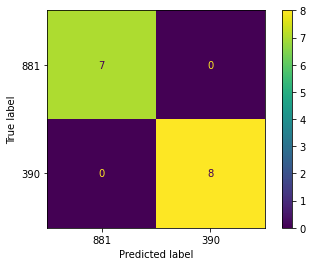

In [21]:
model.cm()

#### 2.1.4. Trajectory XGBoost (TXGB)


In [22]:
from matclassification.methods import TXGB

model = TXGB()
model.prepare_input(train, test)
model.train()
model.test()

2024-06-30 21:13:50.905706

[TXGB:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 151 unique values
Attribute 'time': 434 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 137 unique values
Attribute 'type': 85 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 41 unique values
Attribute 'weather': 5 unique values
Attribute 'tid': 31 unique values
Total of attribute/value pairs: 901


###########      DATA ENCODING        ###########
Checking sets split count (train, <validation>, test):
   TIDs_0: 31
   TIDs_1: 15
Encoding string data to integer
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather
Label encoding on label y
[TXGB:] Training hiperparameter model


[TXGB:] Model Training:   0%|          | 0/96 [00:00<?, ?it/s]

[TXGB:] Creating a model to test set
[TXGB:] Evaluation Config - 2000-3-0.01-0.0-0.1-0.5-1.0-100-merror-20


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TXGB:] Processing time: 10199.032000000001 milliseconds. Done.


(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0       1.0              0                1.0              1.0           1.0   
 
    f1_macro    clstime  
 0       1.0  10198.058  ,
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32))

In [23]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,0.0,1.0,1.0,1.0,1.0,10198.058


#### 2.1.5. BITULER


In [24]:
from matclassification.methods import Bituler

model = Bituler()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()

2024-06-30 21:14:01.233938

[Bituler:] Building model

###########    DATA PREPARATION      ###########
Attribute 'poi': 137 unique values
Total of attribute/value pairs: 137


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 31
... tid_1: 15
col_name: ['poi', 'tid', 'label']...
... num_classes: 2
... max_lenght: 38
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: poi


###########      Generating y_train and y_test     ###########
Label encoding on label y
Input total: 2
[Bituler:] Training hiperparameter model


[Bituler:] Model Training:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6977 - acc: 0.3548 - val_loss: 0.6903 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6853 - acc: 0.6129 - val_loss: 0.6836 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 871ms/step - loss: 0.6783 - acc: 0.5806 - val_loss: 0.6766 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 899ms/step - loss: 0.6716 - acc: 0.5484 - val_loss: 0.6686 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6591 - acc: 0.5484 - val_loss: 0.6587 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 1s 630ms/step - loss: 0.6411 - acc: 0.5806 - val_loss: 0.6463 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 1s 947ms/step - loss: 0.6383 - acc: 0.5806 - val_loss: 0.6297 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 0s 380ms/step - loss: 0.6198 - ac

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6907 - acc: 0.5484 - val_loss: 0.6807 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6702 - acc: 0.6774 - val_loss: 0.6687 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6579 - acc: 0.7097 - val_loss: 0.6549 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 700ms/step - loss: 0.6454 - acc: 0.6774 - val_loss: 0.6377 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6271 - acc: 0.7097 - val_loss: 0.6153 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 1s 667ms/step - loss: 0.5885 - acc: 0.8710 - val_loss: 0.5859 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 928ms/step - loss: 0.5876 - acc: 0.8387 - val_loss: 0.5471 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 315ms/step - loss: 0.5340 - acc: 

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6861 - acc: 0.6129 - val_loss: 0.6702 - val_acc: 0.6000
Epoch 2/1000
1/1 [==============================] - 1s 913ms/step - loss: 0.6659 - acc: 0.7419 - val_loss: 0.6556 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 689ms/step - loss: 0.6515 - acc: 0.6774 - val_loss: 0.6389 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 547ms/step - loss: 0.6293 - acc: 0.6129 - val_loss: 0.6180 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 997ms/step - loss: 0.6147 - acc: 0.6452 - val_loss: 0.5918 - val_acc: 0.7333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5655 - acc: 0.8387 - val_loss: 0.5584 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 604ms/step - loss: 0.5436 - acc: 0.9032 - val_loss: 0.5154 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 588ms/step - loss: 0.4903 -

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6950 - acc: 0.3871 - val_loss: 0.6788 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6749 - acc: 0.5806 - val_loss: 0.6620 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6530 - acc: 0.5484 - val_loss: 0.6430 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6328 - acc: 0.6129 - val_loss: 0.6192 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 1s 763ms/step - loss: 0.6030 - acc: 0.7419 - val_loss: 0.5890 - val_acc: 0.8667
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5631 - acc: 0.9677 - val_loss: 0.5518 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 446ms/step - loss: 0.5408 - acc: 0.9355 - val_loss: 0.5051 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 390ms/step - loss: 0.4934 - acc: 0.9

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6934 - acc: 0.5484 - val_loss: 0.6890 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6855 - acc: 0.5484 - val_loss: 0.6818 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6784 - acc: 0.5484 - val_loss: 0.6728 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6703 - acc: 0.5484 - val_loss: 0.6593 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 685ms/step - loss: 0.6580 - acc: 0.5484 - val_loss: 0.6379 - val_acc: 0.7333
Epoch 6/1000
1/1 [==============================] - 0s 440ms/step - loss: 0.6232 - acc: 0.7419 - val_loss: 0.6030 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 590ms/step - loss: 0.5943 - acc: 0.9355 - val_loss: 0.5478 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 316ms/step - loss: 0.5354 - acc: 

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6894 - acc: 0.5484 - val_loss: 0.6763 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6782 - acc: 0.6774 - val_loss: 0.6592 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6522 - acc: 0.7419 - val_loss: 0.6366 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6409 - acc: 0.7097 - val_loss: 0.6032 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 377ms/step - loss: 0.6097 - acc: 0.9355 - val_loss: 0.5521 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 187ms/step - loss: 0.5433 - acc: 1.0000 - val_loss: 0.4810 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 834ms/step - loss: 0.4870 - acc: 0.9355 - val_loss: 0.4229 - val_acc: 0.8000
Epoch 8/1000
1/1 [==============================] - 1s 806ms/step - loss: 0.4213 - acc: 

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6939 - acc: 0.4516 - val_loss: 0.6731 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6675 - acc: 0.5806 - val_loss: 0.6522 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6412 - acc: 0.5484 - val_loss: 0.6239 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 893ms/step - loss: 0.6165 - acc: 0.6452 - val_loss: 0.5809 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 918ms/step - loss: 0.5725 - acc: 0.8710 - val_loss: 0.5190 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 784ms/step - loss: 0.5039 - acc: 1.0000 - val_loss: 0.4341 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 683ms/step - loss: 0.4274 - acc: 1.0000 - val_loss: 0.3378 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 657ms/step - loss: 0.3399 - ac

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 0.6856 - acc: 0.6129 - val_loss: 0.6703 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6592 - acc: 0.5484 - val_loss: 0.6454 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6335 - acc: 0.6129 - val_loss: 0.6090 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 1s 830ms/step - loss: 0.6085 - acc: 0.8065 - val_loss: 0.5538 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 602ms/step - loss: 0.5432 - acc: 0.9677 - val_loss: 0.4761 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 112ms/step - loss: 0.4588 - acc: 1.0000 - val_loss: 0.3824 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 691ms/step - loss: 0.3654 - acc: 0.9032 - val_loss: 0.2837 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 308ms/step - loss: 0.2792 - ac

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6947 - acc: 0.4194 - val_loss: 0.6859 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6853 - acc: 0.6452 - val_loss: 0.6776 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 814ms/step - loss: 0.6714 - acc: 0.5806 - val_loss: 0.6666 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 599ms/step - loss: 0.6636 - acc: 0.5484 - val_loss: 0.6479 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 986ms/step - loss: 0.6424 - acc: 0.5806 - val_loss: 0.6142 - val_acc: 0.8000
Epoch 6/1000
1/1 [==============================] - 1s 728ms/step - loss: 0.5930 - acc: 0.8710 - val_loss: 0.5534 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 615ms/step - loss: 0.5475 - acc: 0.9355 - val_loss: 0.4882 - val_acc: 0.7333
Epoch 8/1000
1/1 [==============================] - 0s 363ms/step - loss: 0.4792 -

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6901 - acc: 0.5484 - val_loss: 0.6738 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6727 - acc: 0.6129 - val_loss: 0.6535 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6478 - acc: 0.6774 - val_loss: 0.6244 - val_acc: 0.6000
Epoch 4/1000
1/1 [==============================] - 1s 605ms/step - loss: 0.6145 - acc: 0.7419 - val_loss: 0.5771 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 1s 609ms/step - loss: 0.5689 - acc: 0.9032 - val_loss: 0.4984 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 463ms/step - loss: 0.4867 - acc: 1.0000 - val_loss: 0.4035 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 798ms/step - loss: 0.4029 - acc: 0.8710 - val_loss: 0.3016 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 840ms/step - loss: 0.3064 - ac

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6928 - acc: 0.5161 - val_loss: 0.6712 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 907ms/step - loss: 0.6694 - acc: 0.5806 - val_loss: 0.6439 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6377 - acc: 0.7742 - val_loss: 0.6046 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6088 - acc: 0.8710 - val_loss: 0.5432 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 461ms/step - loss: 0.5446 - acc: 1.0000 - val_loss: 0.4458 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 301ms/step - loss: 0.4350 - acc: 1.0000 - val_loss: 0.3384 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 602ms/step - loss: 0.3555 - acc: 0.8387 - val_loss: 0.2220 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 683ms/step - loss: 0.2118 - ac

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6919 - acc: 0.5484 - val_loss: 0.6680 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6618 - acc: 0.7097 - val_loss: 0.6416 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6360 - acc: 0.7419 - val_loss: 0.6021 - val_acc: 0.8667
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6000 - acc: 0.8065 - val_loss: 0.5409 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 341ms/step - loss: 0.5429 - acc: 0.9355 - val_loss: 0.4476 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 458ms/step - loss: 0.4253 - acc: 1.0000 - val_loss: 0.3316 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 856ms/step - loss: 0.3228 - acc: 0.9355 - val_loss: 0.2016 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 422ms/step - loss: 0.1936 - acc: 

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6936 - acc: 0.5484 - val_loss: 0.6830 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 887ms/step - loss: 0.6807 - acc: 0.6129 - val_loss: 0.6705 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 818ms/step - loss: 0.6645 - acc: 0.5484 - val_loss: 0.6517 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 787ms/step - loss: 0.6447 - acc: 0.5806 - val_loss: 0.6185 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6153 - acc: 0.7742 - val_loss: 0.5574 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 841ms/step - loss: 0.5493 - acc: 0.9677 - val_loss: 0.4684 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 1s 577ms/step - loss: 0.4671 - acc: 0.8387 - val_loss: 0.3872 - val_acc: 0.8000
Epoch 8/1000
1/1 [==============================] - 1s 532ms/step - loss: 0.3931 -

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6945 - acc: 0.4839 - val_loss: 0.6776 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6714 - acc: 0.7097 - val_loss: 0.6582 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 925ms/step - loss: 0.6538 - acc: 0.6452 - val_loss: 0.6280 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 749ms/step - loss: 0.6220 - acc: 0.7097 - val_loss: 0.5738 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 771ms/step - loss: 0.5586 - acc: 1.0000 - val_loss: 0.4766 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 508ms/step - loss: 0.4603 - acc: 1.0000 - val_loss: 0.3859 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 1s 749ms/step - loss: 0.3827 - acc: 0.7742 - val_loss: 0.2899 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 677ms/step - loss: 0.2561 -

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6903 - acc: 0.6452 - val_loss: 0.6677 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 666ms/step - loss: 0.6612 - acc: 0.5806 - val_loss: 0.6383 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 795ms/step - loss: 0.6314 - acc: 0.6774 - val_loss: 0.5856 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 916ms/step - loss: 0.5753 - acc: 0.8710 - val_loss: 0.4951 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4930 - acc: 1.0000 - val_loss: 0.4250 - val_acc: 0.7333
Epoch 6/1000
1/1 [==============================] - 1s 869ms/step - loss: 0.4144 - acc: 0.8065 - val_loss: 0.3208 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 264ms/step - loss: 0.3131 - acc: 1.0000 - val_loss: 0.2954 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 769ms/step - loss: 0.2666 -

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6870 - acc: 0.5484 - val_loss: 0.6636 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6531 - acc: 0.5806 - val_loss: 0.6282 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6270 - acc: 0.5806 - val_loss: 0.5656 - val_acc: 0.9333
Epoch 4/1000
1/1 [==============================] - 1s 825ms/step - loss: 0.5538 - acc: 0.9032 - val_loss: 0.4574 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 503ms/step - loss: 0.4522 - acc: 1.0000 - val_loss: 0.3384 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 701ms/step - loss: 0.3363 - acc: 0.8710 - val_loss: 0.2069 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 710ms/step - loss: 0.2004 - acc: 1.0000 - val_loss: 0.1990 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 209ms/step - loss: 0.1472 - ac

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.6953 - acc: 0.4516 - val_loss: 0.6884 - val_acc: 0.7333
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6889 - acc: 0.5806 - val_loss: 0.6809 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 901ms/step - loss: 0.6811 - acc: 0.6774 - val_loss: 0.6731 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 740ms/step - loss: 0.6702 - acc: 0.6452 - val_loss: 0.6643 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 941ms/step - loss: 0.6622 - acc: 0.5484 - val_loss: 0.6539 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 1s 784ms/step - loss: 0.6412 - acc: 0.6452 - val_loss: 0.6410 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 1s 747ms/step - loss: 0.6425 - acc: 0.6129 - val_loss: 0.6246 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 1s 538ms/step - loss: 0.6121 -

(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0       1.0            1.0                1.0              1.0           1.0   
 
    f1_macro     clstime  
 0       1.0  335678.996  ,
 array([[0.5065809 , 0.49341917],
        [0.5523806 , 0.44761944],
        [0.5583106 , 0.44168934],
        [0.57983446, 0.42016557],
        [0.56162745, 0.4383726 ],
        [0.56305957, 0.4369405 ],
        [0.58497775, 0.4150222 ],
        [0.3245508 , 0.67544925],
        [0.35772285, 0.64227724],
        [0.3435713 , 0.65642864],
        [0.2637748 , 0.7362252 ],
        [0.316659  , 0.683341  ],
        [0.34295687, 0.65704316],
        [0.3501528 , 0.64984727],
        [0.36667636, 0.6333237 ]], dtype=float32))

In [25]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,335678.996


#### 2.1.6. TULVAE


In [26]:
from matclassification.methods import Tulvae

model = Tulvae()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()

2024-06-30 21:19:36.931500

[Tulvae:] Building model

###########    DATA PREPARATION      ###########
Attribute 'poi': 137 unique values
Total of attribute/value pairs: 137


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 31
... tid_1: 15
col_name: ['poi', 'tid', 'label']...
... num_classes: 2
... max_lenght: 38
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: poi


###########      Generating y_train and y_test     ###########
Label encoding on label y
Input total: 2
[Tulvae:] Training hiperparameter model


[Tulvae:] Model Training:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 10s 10s/step - loss: 0.6999 - acc: 0.2903 - val_loss: 0.6916 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6885 - acc: 0.7097 - val_loss: 0.6858 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6827 - acc: 0.6774 - val_loss: 0.6802 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6804 - acc: 0.6452 - val_loss: 0.6728 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6704 - acc: 0.6452 - val_loss: 0.6622 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6463 - acc: 0.7097 - val_loss: 0.6468 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 1s 843ms/step - loss: 0.6411 - acc: 0.6452 - val_loss: 0.6239 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 1s 773ms/step - loss: 0.6052 - acc: 0.74

Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 0.6948 - acc: 0.5806 - val_loss: 0.6895 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6833 - acc: 0.6452 - val_loss: 0.6834 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6786 - acc: 0.5806 - val_loss: 0.6770 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6722 - acc: 0.5484 - val_loss: 0.6679 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 649ms/step - loss: 0.6608 - acc: 0.5806 - val_loss: 0.6547 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6319 - acc: 0.6129 - val_loss: 0.6358 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 1s 721ms/step - loss: 0.6343 - acc: 0.6129 - val_loss: 0.6072 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 1s 896ms/step - loss: 0.5904 - acc: 0

Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 0.6931 - acc: 0.5161 - val_loss: 0.6887 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6919 - acc: 0.5484 - val_loss: 0.6796 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6763 - acc: 0.7097 - val_loss: 0.6673 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6619 - acc: 0.6452 - val_loss: 0.6492 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6411 - acc: 0.6774 - val_loss: 0.6216 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 1s 562ms/step - loss: 0.5947 - acc: 0.7742 - val_loss: 0.5800 - val_acc: 0.8000
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5780 - acc: 0.7742 - val_loss: 0.5152 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 0s 442ms/step - loss: 0.5007 - acc: 0.87

Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 0.6917 - acc: 0.4839 - val_loss: 0.6932 - val_acc: 0.4667
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6964 - acc: 0.5484 - val_loss: 0.6901 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6847 - acc: 0.5806 - val_loss: 0.6852 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6847 - acc: 0.5484 - val_loss: 0.6790 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6723 - acc: 0.5484 - val_loss: 0.6705 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6477 - acc: 0.6129 - val_loss: 0.6584 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6566 - acc: 0.5484 - val_loss: 0.6397 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 1s 803ms/step - loss: 0.6295 - acc: 0.6452 

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6977 - acc: 0.4839 - val_loss: 0.6926 - val_acc: 0.4667
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6934 - acc: 0.5161 - val_loss: 0.6832 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6822 - acc: 0.6452 - val_loss: 0.6740 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6671 - acc: 0.5806 - val_loss: 0.6603 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6523 - acc: 0.5806 - val_loss: 0.6387 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6045 - acc: 0.8065 - val_loss: 0.6064 - val_acc: 0.6000
Epoch 7/1000
1/1 [==============================] - 1s 830ms/step - loss: 0.5960 - acc: 0.7097 - val_loss: 0.5570 - val_acc: 0.8000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5418 - acc: 0.8710 

Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 0.6954 - acc: 0.4839 - val_loss: 0.6907 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6892 - acc: 0.5806 - val_loss: 0.6810 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6751 - acc: 0.7097 - val_loss: 0.6696 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6669 - acc: 0.5484 - val_loss: 0.6517 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6442 - acc: 0.6452 - val_loss: 0.6222 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5842 - acc: 0.8387 - val_loss: 0.5750 - val_acc: 0.7333
Epoch 7/1000
1/1 [==============================] - 1s 773ms/step - loss: 0.5649 - acc: 0.7742 - val_loss: 0.5012 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 429ms/step - loss: 0.4812 - acc: 0.90

Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 0.6908 - acc: 0.6452 - val_loss: 0.6818 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6926 - acc: 0.4839 - val_loss: 0.6844 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6872 - acc: 0.6774 - val_loss: 0.6755 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6717 - acc: 0.7742 - val_loss: 0.6632 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6581 - acc: 0.7742 - val_loss: 0.6452 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6219 - acc: 0.8387 - val_loss: 0.6189 - val_acc: 0.6000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6027 - acc: 0.7742 - val_loss: 0.5802 - val_acc: 0.7333
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5643 - acc: 0.8065 - v

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6941 - acc: 0.4839 - val_loss: 0.6848 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6838 - acc: 0.6129 - val_loss: 0.6722 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6667 - acc: 0.6129 - val_loss: 0.6561 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6509 - acc: 0.6129 - val_loss: 0.6293 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6178 - acc: 0.7742 - val_loss: 0.5864 - val_acc: 0.8000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5315 - acc: 0.9677 - val_loss: 0.5223 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5038 - acc: 0.9032 - val_loss: 0.4300 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4005 - acc: 0.9355 - v

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6967 - acc: 0.4194 - val_loss: 0.6858 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6819 - acc: 0.7097 - val_loss: 0.6734 - val_acc: 0.6000
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6673 - acc: 0.7419 - val_loss: 0.6567 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6453 - acc: 0.8065 - val_loss: 0.6295 - val_acc: 0.6000
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6269 - acc: 0.7097 - val_loss: 0.5852 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5439 - acc: 0.8710 - val_loss: 0.5175 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5313 - acc: 0.8710 - val_loss: 0.4178 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4041 - acc: 0.9677 - v

Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 0.6920 - acc: 0.6452 - val_loss: 0.6922 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6911 - acc: 0.6129 - val_loss: 0.6873 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6862 - acc: 0.5484 - val_loss: 0.6815 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6815 - acc: 0.5484 - val_loss: 0.6714 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6643 - acc: 0.5806 - val_loss: 0.6533 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6394 - acc: 0.6129 - val_loss: 0.6202 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 0s 484ms/step - loss: 0.6031 - acc: 0.6774 - val_loss: 0.5585 - val_acc: 0.7333
Epoch 8/1000
1/1 [==============================] - 1s 942ms/step - loss: 0.5430 - acc: 0.83

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6931 - acc: 0.5484 - val_loss: 0.6875 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6861 - acc: 0.6129 - val_loss: 0.6796 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6790 - acc: 0.6452 - val_loss: 0.6660 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6673 - acc: 0.6774 - val_loss: 0.6414 - val_acc: 0.6000
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6370 - acc: 0.7742 - val_loss: 0.5952 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5711 - acc: 0.9355 - val_loss: 0.5087 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5045 - acc: 1.0000 - val_loss: 0.3712 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3711 - acc: 1.0000 - v

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6921 - acc: 0.5484 - val_loss: 0.6883 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6873 - acc: 0.5484 - val_loss: 0.6794 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6781 - acc: 0.5806 - val_loss: 0.6655 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6591 - acc: 0.5484 - val_loss: 0.6398 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6309 - acc: 0.5806 - val_loss: 0.5903 - val_acc: 0.8000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5533 - acc: 0.9355 - val_loss: 0.4975 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4846 - acc: 1.0000 - val_loss: 0.3580 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 567ms/step - loss: 0.3618 - acc: 0.9355 

Epoch 1/1000
1/1 [==============================] - 13s 13s/step - loss: 0.6908 - acc: 0.7419 - val_loss: 0.6897 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6890 - acc: 0.6129 - val_loss: 0.6845 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6835 - acc: 0.5806 - val_loss: 0.6757 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6734 - acc: 0.5806 - val_loss: 0.6610 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6588 - acc: 0.5806 - val_loss: 0.6336 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6045 - acc: 0.7742 - val_loss: 0.5824 - val_acc: 0.9333
Epoch 7/1000
1/1 [==============================] - 1s 820ms/step - loss: 0.5745 - acc: 0.8065 - val_loss: 0.4889 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4822 - acc: 1.0000 

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6940 - acc: 0.5161 - val_loss: 0.6865 - val_acc: 0.8667
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6840 - acc: 0.7419 - val_loss: 0.6740 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6699 - acc: 0.7097 - val_loss: 0.6538 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6536 - acc: 0.7419 - val_loss: 0.6166 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6129 - acc: 0.7742 - val_loss: 0.5455 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5113 - acc: 0.9677 - val_loss: 0.4184 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 668ms/step - loss: 0.4121 - acc: 1.0000 - val_loss: 0.2541 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2502 - acc: 0.9677 

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6949 - acc: 0.4839 - val_loss: 0.6881 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6861 - acc: 0.5484 - val_loss: 0.6765 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6720 - acc: 0.6452 - val_loss: 0.6561 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6449 - acc: 0.7097 - val_loss: 0.6155 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6013 - acc: 0.8387 - val_loss: 0.5338 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4861 - acc: 0.9677 - val_loss: 0.3848 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.3729 - acc: 1.0000 - val_loss: 0.2239 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2459 - acc: 0.9355 - v

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.6919 - acc: 0.5484 - val_loss: 0.6869 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6860 - acc: 0.7419 - val_loss: 0.6734 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6690 - acc: 0.7097 - val_loss: 0.6512 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6447 - acc: 0.7097 - val_loss: 0.6090 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5964 - acc: 0.9032 - val_loss: 0.5298 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 976ms/step - loss: 0.4965 - acc: 1.0000 - val_loss: 0.3963 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 760ms/step - loss: 0.3878 - acc: 0.9677 - val_loss: 0.2820 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 888ms/step - loss: 0.2924 - acc: 0

Epoch 1/1000
1/1 [==============================] - 13s 13s/step - loss: 0.6915 - acc: 0.4839 - val_loss: 0.6872 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6828 - acc: 0.5484 - val_loss: 0.6742 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6716 - acc: 0.6129 - val_loss: 0.6519 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6469 - acc: 0.6774 - val_loss: 0.6086 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5872 - acc: 0.8065 - val_loss: 0.5262 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4745 - acc: 1.0000 - val_loss: 0.3814 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3655 - acc: 1.0000 - val_loss: 0.1931 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 354ms/step - loss: 0.1858 - acc: 1.0000 

Epoch 1/1000
1/1 [==============================] - 14s 14s/step - loss: 0.6912 - acc: 0.6452 - val_loss: 0.6828 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6869 - acc: 0.5161 - val_loss: 0.6680 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6570 - acc: 0.6452 - val_loss: 0.6366 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6322 - acc: 0.7419 - val_loss: 0.5726 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5771 - acc: 0.8387 - val_loss: 0.4532 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4105 - acc: 0.9677 - val_loss: 0.2744 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2777 - acc: 0.9677 - val_loss: 0.1228 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 0.1295 - acc: 0.9677 - v

Epoch 1/1000
1/1 [==============================] - 15s 15s/step - loss: 0.6931 - acc: 0.4839 - val_loss: 0.6915 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6890 - acc: 0.6129 - val_loss: 0.6867 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6844 - acc: 0.5806 - val_loss: 0.6781 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6736 - acc: 0.5806 - val_loss: 0.6600 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6548 - acc: 0.6129 - val_loss: 0.6192 - val_acc: 0.6000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5955 - acc: 0.8710 - val_loss: 0.5251 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 794ms/step - loss: 0.5115 - acc: 1.0000 - val_loss: 0.3758 - val_acc: 0.9333
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3926 - acc: 0.8387 

Epoch 1/1000
1/1 [==============================] - 15s 15s/step - loss: 0.6935 - acc: 0.5484 - val_loss: 0.6901 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6920 - acc: 0.5161 - val_loss: 0.6824 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6833 - acc: 0.6452 - val_loss: 0.6685 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6661 - acc: 0.7097 - val_loss: 0.6384 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6340 - acc: 0.6774 - val_loss: 0.5694 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 3s 3s/step - loss: 0.5486 - acc: 1.0000 - val_loss: 0.4227 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 872ms/step - loss: 0.4240 - acc: 1.0000 - val_loss: 0.3665 - val_acc: 0.7333
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4137 - acc: 0.7419 

Epoch 1/1000
1/1 [==============================] - 14s 14s/step - loss: 0.6936 - acc: 0.4839 - val_loss: 0.6883 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6858 - acc: 0.7419 - val_loss: 0.6792 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6797 - acc: 0.7097 - val_loss: 0.6594 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6575 - acc: 0.7097 - val_loss: 0.6146 - val_acc: 0.8000
Epoch 5/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6134 - acc: 0.7742 - val_loss: 0.5084 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4950 - acc: 1.0000 - val_loss: 0.3526 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3652 - acc: 0.8065 - val_loss: 0.1840 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.1788 - acc: 1.0000 - v

Epoch 1/1000
1/1 [==============================] - 16s 16s/step - loss: 0.6915 - acc: 0.4839 - val_loss: 0.6887 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6860 - acc: 0.5484 - val_loss: 0.6787 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6727 - acc: 0.6774 - val_loss: 0.6595 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6549 - acc: 0.6452 - val_loss: 0.6186 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6077 - acc: 0.7419 - val_loss: 0.5250 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 3s 3s/step - loss: 0.4887 - acc: 0.9677 - val_loss: 0.3527 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.3423 - acc: 0.9355 - val_loss: 0.1510 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.1389 - acc: 1.0000 - v

Epoch 1/1000
1/1 [==============================] - 16s 16s/step - loss: 0.6936 - acc: 0.5161 - val_loss: 0.6866 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6866 - acc: 0.7097 - val_loss: 0.6719 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6692 - acc: 0.6129 - val_loss: 0.6394 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6353 - acc: 0.7097 - val_loss: 0.5665 - val_acc: 0.8667
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5532 - acc: 0.8065 - val_loss: 0.4065 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.3680 - acc: 1.0000 - val_loss: 0.2154 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2269 - acc: 0.9355 - val_loss: 0.1211 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0934 - acc: 1.0000 - v

Epoch 1/1000
1/1 [==============================] - 16s 16s/step - loss: 0.6956 - acc: 0.4516 - val_loss: 0.6854 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6805 - acc: 0.5806 - val_loss: 0.6687 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6656 - acc: 0.5806 - val_loss: 0.6285 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6159 - acc: 0.7742 - val_loss: 0.5292 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5125 - acc: 0.9677 - val_loss: 0.3475 - val_acc: 0.9333
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3284 - acc: 0.9355 - val_loss: 0.1423 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 3s 3s/step - loss: 0.1507 - acc: 1.0000 - val_loss: 0.4242 - val_acc: 0.6667
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3005 - acc: 0.8387 - v

Epoch 1/1000
1/1 [==============================] - 16s 16s/step - loss: 0.6933 - acc: 0.4839 - val_loss: 0.6867 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6851 - acc: 0.5484 - val_loss: 0.6706 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6675 - acc: 0.6129 - val_loss: 0.6396 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6419 - acc: 0.6452 - val_loss: 0.5646 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5599 - acc: 0.9032 - val_loss: 0.4048 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3894 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.3435 - acc: 0.7742 - val_loss: 0.1823 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.1585 - acc: 1.0000 - v

Epoch 1/1000
1/1 [==============================] - 17s 17s/step - loss: 0.6956 - acc: 0.4516 - val_loss: 0.6874 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6854 - acc: 0.6129 - val_loss: 0.6759 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6735 - acc: 0.7097 - val_loss: 0.6492 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6458 - acc: 0.7097 - val_loss: 0.5854 - val_acc: 0.9333
Epoch 5/1000
1/1 [==============================] - 4s 4s/step - loss: 0.5752 - acc: 0.8387 - val_loss: 0.4385 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3971 - acc: 1.0000 - val_loss: 0.2929 - val_acc: 0.8667
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.3075 - acc: 0.8065 - val_loss: 0.1769 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 0.1542 - acc: 1.0000 - v

Epoch 1/1000
1/1 [==============================] - 17s 17s/step - loss: 0.6906 - acc: 0.5484 - val_loss: 0.6861 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6799 - acc: 0.5484 - val_loss: 0.6591 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6570 - acc: 0.7097 - val_loss: 0.6012 - val_acc: 0.7333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.5917 - acc: 0.8387 - val_loss: 0.4655 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 3s 3s/step - loss: 0.4564 - acc: 0.9677 - val_loss: 0.2516 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 3s 3s/step - loss: 0.2347 - acc: 1.0000 - val_loss: 0.0949 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0727 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0062 - acc: 1.0000 - v

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1000
1/1 [==============================] - 16s 16s/step - loss: 0.6920 - acc: 0.5161 - val_loss: 0.6921 - val_acc: 0.5333
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6892 - acc: 0.6774 - val_loss: 0.6904 - val_acc: 0.5333
Epoch 3/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6862 - acc: 0.5806 - val_loss: 0.6870 - val_acc: 0.5333
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6806 - acc: 0.5806 - val_loss: 0.6826 - val_acc: 0.5333
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6790 - acc: 0.5806 - val_loss: 0.6764 - val_acc: 0.5333
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6518 - acc: 0.5806 - val_loss: 0.6674 - val_acc: 0.5333
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6628 - acc: 0.5806 - val_loss: 0.6536 - val_acc: 0.5333
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6308 - acc: 0.6129 - v

(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0       1.0            1.0                1.0              1.0           1.0   
 
    f1_macro      clstime  
 0       1.0  1200623.688  ,
 array([[0.52313113, 0.47686893],
        [0.5784474 , 0.42155263],
        [0.5728779 , 0.42712215],
        [0.59499395, 0.4050061 ],
        [0.5869492 , 0.41305083],
        [0.5763522 , 0.42364785],
        [0.59864753, 0.4013525 ],
        [0.31533653, 0.6846635 ],
        [0.36025256, 0.6397475 ],
        [0.3657776 , 0.6342224 ],
        [0.3062105 , 0.69378954],
        [0.33576033, 0.66423965],
        [0.37066722, 0.62933284],
        [0.37626898, 0.6237311 ],
        [0.3960342 , 0.60396576]], dtype=float32))

In [27]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,1.0,1.0,1.0,1.0,1.0,1.0,1200623.688


### 2.2. Movelet Based Methods

Movelet-based methods, for classifiers that previously use a movelet extraction method.

Let's start by extracting movelets from the train and test data, so we save the data:

In [28]:
from matdata.converter import df2csv

data_path = 'sample/data/FoursquareNYC'

df2csv(train, data_path, 'train')
df2csv(test, data_path, 'test')
#test.to_csv('sample/data/FoursquareNYC/test.csv', index=False)

Writing CSV: sample/data/FoursquareNYC/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/test.csv
Done.
 --------------------------------------------------------------------------------


,tid,label,space,time,day,poi,type,root_type,rating,weather
0,11035,390,40.7024350000000 -73.9870730000000,1082,Tuesday,reBar,Bar,Nightlife Spot,-1.0,Clouds
1,11035,390,40.7509455224884 -74.0056339217607,449,Wednesday,Harry Fox Agency,Office,Professional & Other Places,-1.0,Clouds
2,11035,390,40.7509455224884 -74.0056339217607,480,Thursday,Harry Fox Agency,Office,Professional & Other Places,-1.0,Clouds
3,11035,390,40.7452086435588 -74.0023612976074,620,Thursday,Billy's Bakery,Cupcake Shop,Food,9.0,Clouds
4,11035,390,40.7504159978144 -74.0030630705807,812,Thursday,High Line,Park,Outdoors & Recreation,9.7,Clouds
...,...,...,...,...,...,...,...,...,...,...
156,24455,881,40.7478827722694 -73.9871379446347,297,Friday,Space Billiards,Bar,Nightlife Spot,6.2,Clear
157,24455,881,40.8340978041072 -73.9452672225881,466,Friday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds
158,24455,881,40.8079950658704 -73.9638555049896,1371,Friday,MTA Bus Stop - 116th & Broadway (M4/M60/M104),Bus Station,Travel & Transport,-1.0,Rain
159,24455,881,40.8331652006224 -73.9418603427692,349,Saturday,Wayne Manor ( Bat Cave ),Home (private),Residence,-1.0,Clouds


In [29]:
from matdata.converter import df2parquet

data_path = 'sample/data/FoursquareNYC'

df2parquet(train, data_path, 'train')
df2parquet(test, data_path, 'test')

Writing Parquet: sample/data/FoursquareNYC/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/test.parquet
Done.
 --------------------------------------------------------------------------------


,tid,label,space,time,day,poi,type,root_type,rating,weather
0,11035,390,40.7024350000000 -73.9870730000000,1082,Tuesday,reBar,Bar,Nightlife Spot,-1.0,Clouds
1,11035,390,40.7509455224884 -74.0056339217607,449,Wednesday,Harry Fox Agency,Office,Professional & Other Places,-1.0,Clouds
2,11035,390,40.7509455224884 -74.0056339217607,480,Thursday,Harry Fox Agency,Office,Professional & Other Places,-1.0,Clouds
3,11035,390,40.7452086435588 -74.0023612976074,620,Thursday,Billy's Bakery,Cupcake Shop,Food,9.0,Clouds
4,11035,390,40.7504159978144 -74.0030630705807,812,Thursday,High Line,Park,Outdoors & Recreation,9.7,Clouds
...,...,...,...,...,...,...,...,...,...,...
156,24455,881,40.7478827722694 -73.9871379446347,297,Friday,Space Billiards,Bar,Nightlife Spot,6.2,Clear
157,24455,881,40.8340978041072 -73.9452672225881,466,Friday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds
158,24455,881,40.8079950658704 -73.9638555049896,1371,Friday,MTA Bus Stop - 116th & Broadway (M4/M60/M104),Bus Station,Travel & Transport,-1.0,Rain
159,24455,881,40.8331652006224 -73.9418603427692,349,Saturday,Wayne Manor ( Bat Cave ),Home (private),Residence,-1.0,Clouds


a) First, we can apply a method for movelets extraction like [HiPerMovelets](https://github.com/bigdata-ufsc/HiPerMovelets), for example configuration:

In [37]:
# To download the excutable:
!curl -o sample/programs/MoveletDiscovery.jar https://raw.githubusercontent.com/mat-analysis/mat-tools/main/jarfiles/MoveletDiscovery.jar 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.1M  100 77.1M    0     0  4043k      0  0:00:19  0:00:19 --:--:-- 6455k


In [38]:
# Running the movelet extractor HiPerMovelets:
!java -Xmx7G -jar "./sample/programs/MoveletDiscovery.jar" \
-curpath "./sample/data/FoursquareNYC" \
-respath "./sample/results/hiper" \
-descfile "./sample/data/FoursquareNYC/FoursquareNYC.json" \
-nt 1 -version hiper -ms -1 -Ms -3 -TC 1d

Sun Jun 30 23:04:52 BRT 2024
log4j:WARN No appenders could be found for logger (org.apache.hadoop.util.Shell).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.
Starting Movelets +Log extractor 
Configurations:
   -curpath		Datasets directory:	./sample/data/FoursquareNYC
   -respath		Results directory: 	./sample/results/hiper/Movelets/HIPER_Log_FoursquareNYC_LSP_ED
   -descfile 		Description file : 	./sample/data/FoursquareNYC/FoursquareNYC.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           |

b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv:

In [39]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


In [40]:
import pandas as pd
movelets_train = pd.read_csv('./sample/results/hiper/train.csv')
movelets_test = pd.read_csv('./sample/results/hiper/test.csv')

Next, let's use the movelets for classification ...

#### 2.2.1. Movelet Multi-Layer Perceptron (MMLP)

*In this case we don´t need `model.train()` to train models for finding the best configuration parameters. Because the model use movelets, those are already the most discriminant patterns in data. Thus, the neural network was already tunned to this type of input.

In [41]:
from matclassification.methods import MMLP

model = MMLP()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()

2024-06-30 23:05:10.871841

[MMLP:] Building model
[MMLP:] Training hiperparameter model
Epoch 1/80


InvalidArgumentError: Graph execution error:

Detected at node 'in_top_k/InTopKV2' defined at (most recent call last):
    File "/Users/tarlisportela/miniforge3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/tarlisportela/miniforge3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/dr/fz9zzkjx71s814x_62jv3zwr0000gn/T/ipykernel_20979/2565433262.py", line 5, in <cell line: 5>
      model.train()
    File "/Users/tarlisportela/workdir/programs/mat-classification-pkg/matclassification/methods/core/HSClassifier.py", line 71, in train
      self.fit(X_train, y_train, X_val, y_val) #, config)
    File "/Users/tarlisportela/workdir/programs/mat-classification-pkg/matclassification/methods/feature/MoveletMLP.py", line 104, in fit
      history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, batch_size=par_batch_size, verbose=verbose)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 691, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/metrics/accuracy_metrics.py", line 494, in top_k_categorical_accuracy
      return metrics_utils.sparse_top_k_categorical_matches(
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 1006, in sparse_top_k_categorical_matches
      tf.math.in_top_k(
Node: 'in_top_k/InTopKV2'
Detected at node 'in_top_k/InTopKV2' defined at (most recent call last):
    File "/Users/tarlisportela/miniforge3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/tarlisportela/miniforge3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/dr/fz9zzkjx71s814x_62jv3zwr0000gn/T/ipykernel_20979/2565433262.py", line 5, in <cell line: 5>
      model.train()
    File "/Users/tarlisportela/workdir/programs/mat-classification-pkg/matclassification/methods/core/HSClassifier.py", line 71, in train
      self.fit(X_train, y_train, X_val, y_val) #, config)
    File "/Users/tarlisportela/workdir/programs/mat-classification-pkg/matclassification/methods/feature/MoveletMLP.py", line 104, in fit
      history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, batch_size=par_batch_size, verbose=verbose)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 691, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/metrics/accuracy_metrics.py", line 494, in top_k_categorical_accuracy
      return metrics_utils.sparse_top_k_categorical_matches(
    File "/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 1006, in sparse_top_k_categorical_matches
      tf.math.in_top_k(
Node: 'in_top_k/InTopKV2'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  input must have at least k columns. Had 2, needed 5
	 [[{{node in_top_k/InTopKV2}}]]
	 [[clip_by_value_1/_28]]
  (1) INVALID_ARGUMENT:  input must have at least k columns. Had 2, needed 5
	 [[{{node in_top_k/InTopKV2}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1856870]

In [ ]:
model.summary()

In [ ]:
model.cm()

In [ ]:
# This is another version, without hiper-parameter search:
from matclassification.methods.feature.MoveletMLP import MMLP1

model = MMLP1()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()
model.summary()

#### 2.2.2. Movelet Random Forrest (MRF)


In [ ]:
from matclassification.methods import MRF

model = MRF()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

#### 2.2.3. Movelet Random Forrest with HiperParameter Search (MRFHP)

In [ ]:
from matclassification.methods import MRFHP

model = MRFHP()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.2.4. Movelet Support Vector Machine (MSCV)

In [ ]:
from matclassification.methods import MSVC

model = MSVC()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.2.5. Movelet Decision Tree (MDT)

In [ ]:
from matclassification.methods import MDT

model = MDT()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

In [ ]:
fig = model.plot_tree()

In [ ]:
model.graph_tree()

### 2.3. Feature-Based Methods

Feature-based methods input extracted features from trajectory data

#### 2.3.1. POI-Sequences (extention of POI-Frequency)

In [ ]:
from matclassification.methods import POIS

sequences = [1] # Sequence sizes to use, example, for 1, 2 or 3 points use: [1, 2, 3] 
features = ['poi'] # Features to build frequency matrix combined with sequence sizes, 
                   # by default selects the feature with higher variance
# method='npoi' # you can pass the extract method

model = POIS('npoi', sequences, features)
model.prepare_input(train, test)
model.train()
model.test()

In [ ]:
model.summary()

In [ ]:
# Plot Confusion Matrix:
model.cm()

If you want to use just the feature extractor, you can check `poifreq` submodule:

In [ ]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1,2,3]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

In [ ]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

And then you can create the classifier (another way of using the classifier classes in the classical way):

In [ ]:
from matclassification.methods.feature.POIS import POIS, prepareData

sequences = [1]
features = ['poi']

# POIS method have a method for data transformation:
num_features, num_classes, labels, X, y, one_hot_y = prepareData(x_train, x_test, y_train, y_test)
x_train, x_test = X
y_train, y_test = y

# Create the classifier:
model = POIS('npoi', sequences, features)

# Model Label Encoder:
model.le = one_hot_y

# You can add method variables with this:
model.add_config(num_features=num_features,
                num_classes=num_classes, 
                labels=labels)

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)

In [ ]:
summary

The next classifiers use Hiperparameter Optimization (class derrived from `HPSClassifier`), thus we first call `model.train()` to test model configurations to look for the best model.

### 2.4. Similarity-Based Methods (#TODO)

Similarity-based methods input a inverse similarity matrix (distance) from trajectory data

In [7]:
# Dataset Descriptor
from matmodel.descriptor import readDescriptor
dataset_descriptor = readDescriptor('./sample/data/FoursquareNYC/FoursquareNYC.json')

# importing all functions refering similarity measure method:
from matsimilarity.methods.mat import *

# Create the MUITAS object 
muitas = MUITAS(dataset_descriptor)

# Add features to the MUITAS object
muitas.add_feature([dataset_descriptor.attributes[0]], 1)
muitas.add_feature([dataset_descriptor.attributes[1]], 1)
muitas.add_feature([dataset_descriptor.attributes[2]], 0.25)
muitas.add_feature([dataset_descriptor.attributes[3], dataset_descriptor.attributes[4], dataset_descriptor.attributes[5]], 0.25)
muitas.add_feature([dataset_descriptor.attributes[3], dataset_descriptor.attributes[6]], 0.25)
muitas.add_feature([dataset_descriptor.attributes[7]], 0.25)

Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 0.25
Feature: Attributes: [3, 4, 5], Weight: 0.25
Feature: Attributes: [3, 6], Weight: 0.25
Feature: Attributes: [7], Weight: 0.25


In [4]:
# Dataset Descriptor
from matmodel.descriptor import readDescriptor
dataset_descriptor = readDescriptor('./sample/data/FoursquareNYC/FoursquareNYC.json')

# importing all functions refering similarity measure method:
from matsimilarity.methods.mat import MSM

# Create the MUITAS object 
msm = MSM(dataset_descriptor, weights=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])

In [8]:
from matclassification.methods import TSVC

model = TSVC()
model.prepare_input(train, test, metric=muitas)
model.train()
model.test()

2024-09-23 21:03:42.967062

[TSVC:] Building model


Converting Trajectories:   0%|          | 0/112 [00:00<?, ?it/s]

Converting Trajectories:   0%|          | 0/56 [00:00<?, ?it/s]


[TSVC:] Metric provided - MUITAS.


Computing similarity matrix:   0%|          | 0/111 [00:00<?, ?it/s]

ValueError: operands could not be broadcast together with shapes (112,112,108,108,8) (8,108,108,112,112) (112,112,108,108,8) 

In [5]:
from matclassification.methods import TDT

model = TDT()
model.prepare_input(train, test)#, metric=msm)
model.train()
model.test()

2024-09-23 21:02:18.924979

[TDT:] Building model


Converting Trajectories:   0%|          | 0/112 [00:00<?, ?it/s]

Converting Trajectories:   0%|          | 0/56 [00:00<?, ?it/s]


[TDT:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1


Computing similarity matrix:   0%|          | 0/111 [00:00<?, ?it/s]

ValueError: operands could not be broadcast together with shapes (112,112,108,108,8) (8,108,108,112,112) (112,112,108,108,8) 

In [ ]:
model.tree()

#### 2.4.1. Trajectory K-Nearest Neighbors vote

In [6]:
from matclassification.methods import TKNN
model = TKNN(k=3)

X, y = model.prepare_input(train, test, metric=m, inverse=True) # Default metric = MUITAS (default configuration)
model.train()
model.test()

2024-07-06 02:47:01.469191

[TKNN:] Building model


Converting Trajectories:   0%|          | 0/112 [00:00<?, ?it/s]

Converting Trajectories:   0%|          | 0/56 [00:00<?, ?it/s]


[TKNN:] Metric provided - TTP.


Computing similarity matrix:   0%|          | 0/111 [00:00<?, ?it/s]

ValueError: could not broadcast input array from shape (108,) into shape (108,108,8)

In [5]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,0.142857,0.571429,0.1,0.069565,0.453333,0.1,23.124


In [6]:
model.report

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,p0,p1
0,0.142857,0.571429,0.1,0.069565,0.453333,0.1,3,distance


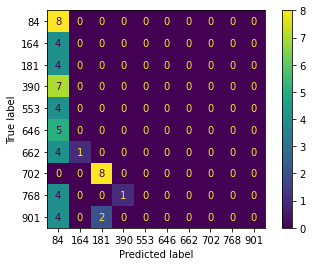

In [10]:
# Plot Confusion Matrix:
model.cm()

In [8]:
model.y_test_true, model.y_test_pred

(array([ 84,  84,  84,  84,  84,  84,  84,  84, 164, 164, 164, 164, 181,
        181, 181, 181, 390, 390, 390, 390, 390, 390, 390, 553, 553, 553,
        553, 646, 646, 646, 646, 646, 662, 662, 662, 662, 662, 702, 702,
        702, 702, 702, 702, 702, 702, 768, 768, 768, 768, 768, 901, 901,
        901, 901, 901, 901]),
 array([ 84,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,
         84,  84, 164, 164, 164, 164, 164, 164, 164, 181, 181, 181, 181,
        181, 181, 181, 181, 390, 390, 390, 390, 390, 390, 390, 390, 390,
        390, 390, 390, 390, 390, 553, 553, 553, 553, 553, 553, 553, 553,
        553, 646, 646, 646]))

In [3]:
import numpy as np
from matsimilarity.core import SimilarityMeasure
from matmodel.base import *
from matmodel.descriptor import *
#np.zeros((3, 5, 3, 6))

class TTP(SimilarityMeasure):
    def __init__(self, dataset_descriptor: DataDescriptor = None, weights = []):
        super().__init__(dataset_descriptor)
        
        if isinstance(weights, np.ndarray):
            weights_sum = weights.sum()
        else:
            weights_sum = sum(weights)
        weights = np.array(weights)
        self.weights = weights / weights_sum
    
    def similarity(self, t1: MultipleAspectSequence, t2: MultipleAspectSequence) -> float:
        return np.fromiter(map(lambda p1: np.fromiter(map(lambda p2: self._score(p1, p2), t2.points), dtype=np.object_), t1.points), dtype=np.object_)

    def _score(self, p1: Point = None, p2: Point = None) -> float:
        matches = np.zeros(len(self.attributes))
#        for idx, _ in enumerate(self.attributes):
        def get_scores(idx):
            a1 = p1.aspects[idx]
            a2 = p2.aspects[idx]
            attr = self._data_descriptor.attributes[idx]
#            threshold = self.thresholds.get(idx, 0)
            distance = attr.comparator.distance(a1, a2)
            return distance
        return np.fromiter(map(lambda x: get_scores(x[0]), enumerate(self.attributes)), dtype=np.float) # * self.weights

In [8]:
from matmodel.util.parsers import df2trajectory

X_train, dd = df2trajectory(train.copy())
X_test, dd = df2trajectory(test.copy())

Converting Trajectories:   0%|          | 0/112 [00:00<?, ?it/s]

Converting Trajectories:   0%|          | 0/56 [00:00<?, ?it/s]

In [7]:
m = TTP(dd)
m.similarity(T[0], T[1]).shape

(41,)

In [18]:
from joblib import Parallel, delayed
from sklearn.utils import gen_even_slices
from tqdm.auto import tqdm
def similarity_matrix(A, B=None, measure=None, n_jobs=1):
    def compute_slice(A, B, s):
        matrix = np.zeros(shape=(len(A), len(B)))

        for i in tqdm(range(s.start + 1, len(A)), desc='Computing similarity matrix'):
            for j in range(0, min(len(B), i - s.start)):
                matrix[i][j] = measure.similarity(A[i], B[j])
        return matrix

    upper = B is not None
    B = A if not B else B
    func = delayed(compute_slice)

    similarity = Parallel(n_jobs=n_jobs, verbose=0)(
        func(A, B[s], s) for s in gen_even_slices(len(B), n_jobs))
    similarity = np.hstack(similarity)

    if not upper:
        similarity += similarity.transpose() + np.identity(len(A))

    return similarity

In [28]:
a = np.zeros((3, 3))
b = np.identity(2)
a + b

ValueError: operands could not be broadcast together with shapes (3,3) (2,2) 

In [19]:
similarity_matrix(X_train, measure=m)

Computing similarity matrix:   0%|          | 0/111 [00:00<?, ?it/s]

ValueError: setting an array element with a sequence.

---
## 3. Scripts

The scripts provided with this package for using some of the library functions in command line environment.

### 3.1. Classifications Methods

In [ ]:
# Only the MARC classifier:
!python3 scripts/cls/MARC.py 'sample/data/FoursquareNYC/train.csv' 'sample/data/FoursquareNYC/test.csv' 'sample/results'

In [ ]:
!python3 scripts/cls/MAT-TC.py --help

In [ ]:
# Methods for trajectory input (includes MARC):
!python3 scripts/cls/MAT-TC.py 'sample/data/FoursquareNYC' 'sample/results' -c 'TRF,TXGB,Tulvae,Bituler,MARC,DeepeST'

In [ ]:
# Methods for movelets input:
!python3 scripts/cls/MAT-MC.py 'sample/results/hiper' -c 'MDT,MMLP,MRF,MSVC,MRFHP'

In [ ]:
# For POI-S classification of sequence sizes concatenated (it does feature extraction):
!python3 scripts/cls/POIS-TC.py 'sample/data/FoursquareNYC' 'sample/results'

In [ ]:
# For POI-S for feature extraction:
!python3 scripts/features/POIS.py 'sample/data/FoursquareNYC' 'sample/results/NPOI_poi_1_2_3'

In [ ]:
# Optionally, for POI-S feature extraction AND classification (it classify each sequence size alone and all sizes concatenated):
!python3 scripts/features/POIS.py 'sample/data/FoursquareNYC' 'sample/results/NPOI_poi_1_2_3' --classify

### 3.3. Helpers for Experimental Results:

a) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv:

In [ ]:
!python3 scripts/helpers/MAT-MergeDatasets.py /Users/tarlisportela/Downloads/sample/results/HpL

In [ ]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

---
# That's all, thanks!

\# By Tarlis Portela (2024)